# **PROJECT OF SOCIAL NETWORK ANALYSIS**
## GROUP F
- Alice Rossi
- Stefano Roscilli Zaffiri 
- Tommaso Giannetti
- Francesco Costa
- Lorenzo Cinelli

## Week 1: Network Selection and Implementation  

In the first week of the assignment, we were tasked with **selecting a network and precisely implementing it in Python**, calculating some important fundamental properties to gain a first understanding of the network chosen.  

For this project, we chose an **undirected and weighted network** based on the film *Forrest Gump*:  
- **Nodes**: Represent characters in the movie.  
- **Edges**: Represent common scene appearances between characters.  
- **Weights**: Indicate the number of shared scenes.  

We were asked to plot our network using different types of graphs. To maintain clarity and avoid clutter, we chose **not to display character names** on the nodes in our visual representation.  

---

### Steps Taken  

1. **Module Imports**  
   We began by importing the necessary Python modules required for all the tasks.  




In [1]:
import random 
import networkx as nx 
import matplotlib.pyplot as plt  
import numpy as np 
import csv 
import time
import sklearn
import pandas as pd
import math
import scipy
from scipy import stats
import time
import pylab
from collections import Counter
from sklearn.metrics.cluster import normalized_mutual_info_score

Then we need to read each csv file with the method 'with open ... as file' , to allow us to work with them. In particular the edges.csv file provided us the information about the links between the characters, and the node.csv gave us the indexes and the name of characters. The last file provided us information on the different properties of the movie. 

In [2]:
# Here we are starting our project by initiating an empty dictionary called nodes
nodes = {}
with open('nodes.csv', mode='r') as file: # using the python function we opened our csv files such as nodes.csv , edges.csv and gprops.csv 
    reader = csv.DictReader(file) #using the dictreader we read the file row by row and we split the different values with the strip function 
    for row in reader:
        index = int(row['# index'].strip())  
        label = row[' label'].strip()  
        nodes[index] = label

edges = [] # we did the same for the list of edges, using the strip method and setting the correct measures (such as float or int)
with open('edges.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        source = int(row['# source'].strip())  
        target = int(row[' target'].strip())  
        weight = float(row[' weight'].strip())  
        edges.append((source, target, weight))


gprops = {}
with open('gprops.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        prop_name = row['# prop_name'].strip()  
        value_str = row[' value'].strip()  
        try:
            value = float(value_str)
        except ValueError:
            value = value_str  
        gprops[prop_name] = value
        

Then we have created the graph using the networkx function,  adding nodes, links and the weight to each link. We plotted two different graphs: 
1. the first one shows in a more general way the different connections and the nodes.
2. the second one is more detailed providing also the indexes for each node and the weight for each link (even if it might seem confusionary at first).

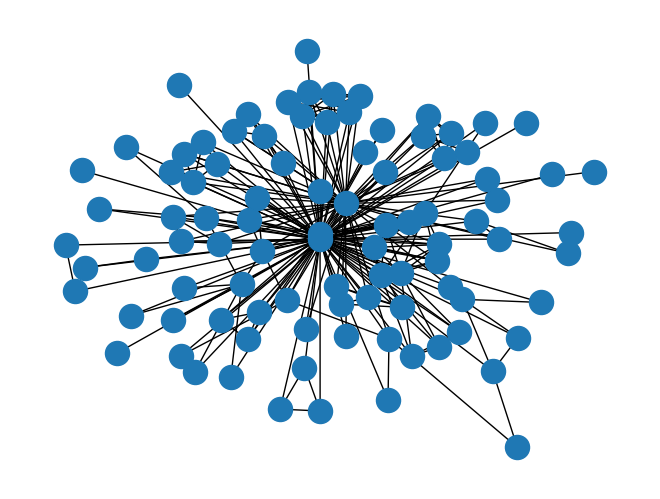

In [3]:
# we used the nx function to plot the graph, 
# we used for loops to add nodes, edges, weights 
G = nx.Graph()


for index, label in nodes.items():
    G.add_node(index, label=label)


for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G)
plt.show()



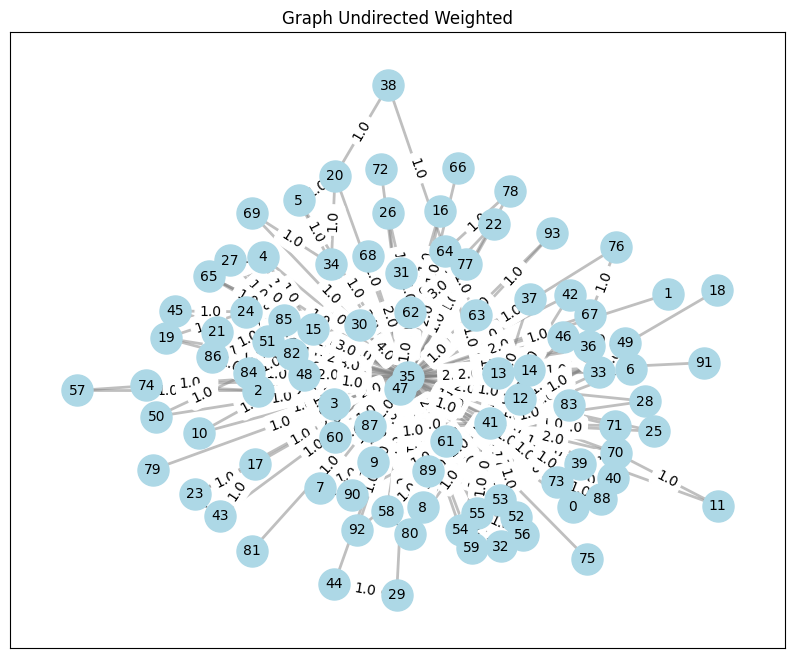

In [4]:
# we plotted the graph in another way by showing the weight on each link and the index of each node. We also used different colors for each part of the graph 
pos = nx.spring_layout(G)  
plt.figure(figsize=(10, 8))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph Undirected Weighted")

plt.show()


The second task for this first week was to find the number of nodes, edges, the Average degree and the Density.
* number of nodes and edges: we used the already existing functions applied to our graph G  ( but we can just see also to the lenght of the graph to find out the number of nodes)
* average degree and density: we created the variables by computing their formulas.


In [5]:
# we used the already existing function for computing the number of nodes and edges
# we set up 3 variables to store the number of neighborhoods, the average degree and the density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
n_neighborhoods = 2*num_edges
average_degree = n_neighborhoods/num_nodes 
density = average_degree / (num_nodes-1) # here and above we just applied the formulas

# we printed out each value and used a for loop to see props and corresponding values 
print(f"Numbers of nodes: {num_nodes}")
print(f"Numbers of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")
print(f"Density: {density:.2f}")
print("Property of the graph:")
for prop, value in gprops.items():
    print(f"{prop}: {value}")

Numbers of nodes: 94
Numbers of edges: 271
Average degree: 5.77
Density: 0.06
Property of the graph:
name: moviegalaxies (316)
description: Social graphs for over 700 movies from the moviegalaxies.com website. Each node represents a character in a movie and each edge is a same-scene appearance between two characters in that movie. The weight gives the number of same-scene appearances. Networks are extracted from movie scripts automatically.
citation: ['J. Kaminski et al., \Moviegalaxies - Social Networks in Movies.\" https://doi.org/10.7910/DVN/T4HBA3
url: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3
tags: ['Social', 'Fictional', 'Weighted']
movie_title: Forrest Gump
imdb_id: tt0109830
release_date: 1994.0
slug: Forrest-Gump


#### Conclusion for the first week : 
By looking at the graph and from the low result we get for our density, d= 0.06 , we can state that the graph is a Sparse Graph.  
This indicates that the nodes are not particularly related to one another in comparison to the number of nodes.

## TASKS WEEK 2  

For the second week, we had to choose between 2 options:  
1. Calculate the average distance and the diameter.  
2. Calculate the average clustering and the transitivity number.  

We chose the second one, and firstly we calculated them with the **networkx** functions.  


In [6]:
#here we are calculating the average clustering  and the transitivity number with te nx built in function 
av_clustering = nx.average_clustering(G)
print ('The Average Clustering:',av_clustering)

nxtransitivitynumber = nx.transitivity(G)
print ('The transitivity number:', nxtransitivitynumber)

The Average Clustering: 0.8002425574908809
The transitivity number: 0.1918081918081918


Then we had to create a function by our own to calculate the transitivity ;

In order to do it we need to create a variable called n_triangles, which represents the number of triangles in our graph.

In [7]:
#In order to create our own function for the transitivity we needed to store some variables

n_triangles = sum(list(nx.triangles(G).values())) // 3  # it calculates the number of triangles in the graph

def transitivity_of(G):
    series_ki = 0 # this variable will be incremented at each iteration of the following for loop
    for i in G:
        degree_ki = len(G[i])   # we calculate the degree for each node in G 
        series_ki = series_ki + (degree_ki * (degree_ki - 1)) / 2 
    return (3 * n_triangles) / series_ki  # we apply the formula (notice the division by 3 has been made up above in the number of the triangles)

print("The transitivity is :", transitivity_of(G))

The transitivity is : 0.1918081918081918


<b>Notice that the number of triangles needs to be divided by 3, otherwise each triangle would be counted thrice. <b>

# TASKS WEEK 3
This week, we were asked to choose a local centrality measure, compute it without using networkx's built-in functions, and justify our choice. We also had to determine the most central node and compute the cumulative distribution of the centrality, along with a graphical representation of the network on various scales.

---

## Choice: Betweenness Centrality  

- **Approach**:  
  - We used nodes and an empty dictionary to store shortest paths, and a list to track visited nodes.  
  - Shortest paths for each node were calculated, ensuring each pair of nodes is analyzed once. If a path involves intermediate nodes, it is saved in `G_paths`.  
  - For each node, the ratio of its contribution to all shortest paths was computed, based on how many paths pass through it.  
  - After applying normalization, results were stored in `normalized_betweenness`.  

- **Output**:  
  The function returns the **normalized betweenness centrality** for each node.  


In [8]:

def normalized_betweenness_of(G):
    nodes = nx.nodes(G)
    num_nodes = G.number_of_nodes()
    G_paths = {}
    visited = []
    # Above  we have that the graph's nodes are stored in 'nodes' and the total number of nodes in 'num_nodes'
    # 'visited' is an empty list to keep track of checked node pairs, and 'G_paths' is a dictionary to store all shortest paths
    
    for i in nodes:
        for j in nodes:
            if i != j and ((i,j) not in visited or (j,i) not in visited):
                visited.append((i, j))
                #For each node pair (i, j) that hasn't been visited, we add it to 'visited' to avoid recalculations

                for path in nx.all_shortest_paths(G, source=i, target=j):
                    # This for loop iterates over all shortest paths between nodes i and j
                    if len(path) > 2:
                        if (i, j) not in G_paths:
                            G_paths[(i, j)] = [path]  
                            # If there is o entry for (i, j) in G_paths, we created a new one and add the path
                        else:
                            G_paths[(i, j)].extend([path])
                            # Otherwise, add the new path to existing paths for (i, j)

    normalized_betweenness = {}
    ratio = 1 / ((num_nodes - 1) * (num_nodes - 2) / 2)
    # Ratio is the normalization factor for betweenness centrality.

    for n in nodes:
        sommatory = 0 
        for shortp in G_paths:
            shortp = G_paths[shortp]
            n_inside_shortp = 0 
            n_of_shortp = len(shortp)
            # For each path set, 'n_inside_shortp' tracks how many paths pass through node 'n'
            # 'n_of_shortp' contains the number of paths between the pair

            for k in shortp:
                k = k[1:-1]  # With this we target nodes from the path
                if n in k:
                    n_inside_shortp += 1
                    # We incremented the counter if 'n' is in the current path

            sommatory += (n_inside_shortp / n_of_shortp)
            

        betweenness = 0.5 * sommatory
        normalized_betweenness[n] = ratio * betweenness
        # We have calculated and stored the normalized betweenness for each node

    return normalized_betweenness
    # It returns the dictionary containing each node's normalized betweenness

betweenness_values = normalized_betweenness_of(G)
print(betweenness_values)


{0: 0.0, 1: 0.0, 2: 0.007534673523453334, 3: 0.00021427458313853825, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0015778401122019644, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.008683964469378217, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0003116721209287829, 35: 0.8073398784478716, 36: 0.0, 37: 0.0, 38: 0.0001168770453482936, 39: 0.0, 40: 0.0, 41: 0.13618902914134373, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0010324139005765936, 48: 0.028054386785102046, 49: 0.0, 50: 0.0, 51: 0.000896057347670251, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.002805049088359046, 63: 0.0007597007947639084, 64: 0.01301620695028831, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.005006233442418577, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 

### The reason why we chose the betweenness centrality 

We picked **betweenness centrality** measure for our Forrest Gump graph because, in the plotted result, we can observe that there aren't a lot of nodes connecting with each other, and the majority of them is linked to some main ones.  

This centrality measure emphasizes significant characters such as **Forrest** and **Jenny**, who serve as bridges between others.  

Then we used the `max` function to find the most central node, discovering that the most central character is **Forrest Gump** with a value of **0.8073**.  


In [9]:
#Here we are using  the sorted python function to sort the items (key and value) for the betweenness in a descending order
#Then we take the node and the value corresponding to the highest value (that will be the first index because of the 'reverse=True')
#After that we take the second highest value 
sorted_betweenness = sorted(betweenness_values.items(), key=lambda x: x[1], reverse=True)

max_betweenness_node = sorted_betweenness[0][0]
max_betweenness_value = sorted_betweenness[0][1]
character_name = nodes.get(max_betweenness_node, "Unknown Character")
print(f"The most central character is {character_name} (node {max_betweenness_node}), with a betweenness value of: {max_betweenness_value:.4f}.")

second_betweenness_node = sorted_betweenness[1][0]
second_betweenness_value = sorted_betweenness[1][1]
second_character_name = nodes.get(second_betweenness_node, "Unknown Character")
print(f"The second most central character is {second_character_name} (node {second_betweenness_node}), with a betweenness value of: {second_betweenness_value:.4f}.")


The most central character is FORREST (node 35), with a betweenness value of: 0.8073.
The second most central character is JENNY (node 41), with a betweenness value of: 0.1362.


The other task was computing the CDF, so we made a function with the argument 'centrality'. 


We have plotted two types of graphs for the CDF changing only the scale:
one <b> scatter plot<b> and the second a <b> log-log <b> graph.

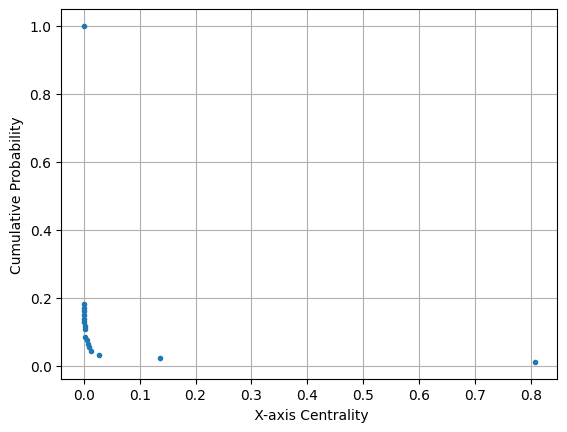

In [10]:
def compute_cdf(centrality):
    
    centrality_values = list(centrality.values())
    num_of = {}
    # It converts centrality values to a list and create an empty dictionary 'num_of' to store counts of each centrality value
    
    for i in centrality_values:
        if i not in num_of:
            num_of[i] = 1
        else:
            num_of[i] = num_of[i] + 1
    # It counts occurrences of each unique centrality value and store them in 'num_of'

    num_of = dict(sorted(num_of.items()))
    # It sorts 'num_of' by centrality value for the following cdf calculation 

    tot_number = sum(list(num_of.values()))
    e = {}
    # The tot_number calculates the total number of nodes and the 'e' empty dictionary is for normalized values

    for i in num_of:
        if num_of[i] == 0:
            e[i] = 0
        else:
            e[i] = num_of[i] / tot_number
    # We have calculated the probability for each centrality value by dividing the number of occurrences by the total number

    e_values = list(e.values())
    cd_y = []
    cd_x = [i for i in e]
    # Now we are preparing the variables for the cdf;  ('cd_y') and the corresponding x-axis values ('cd_x')

    for k in range(len(e_values)):
        cd_y.append(sum(e_values[k:]))
    # Then we have calculated the cumulative sum for probabilities from each centrality value , appending them to the 'cd_y'

    plt.plot(cd_x, cd_y, '.')
    # Plot the cumulative distribution with centrality on the x-axis and cumulative probability on the y-axis

    plt.xlabel(' X-axis Centrality')
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()
    # We set up everything for the plotting

compute_cdf(betweenness_values)


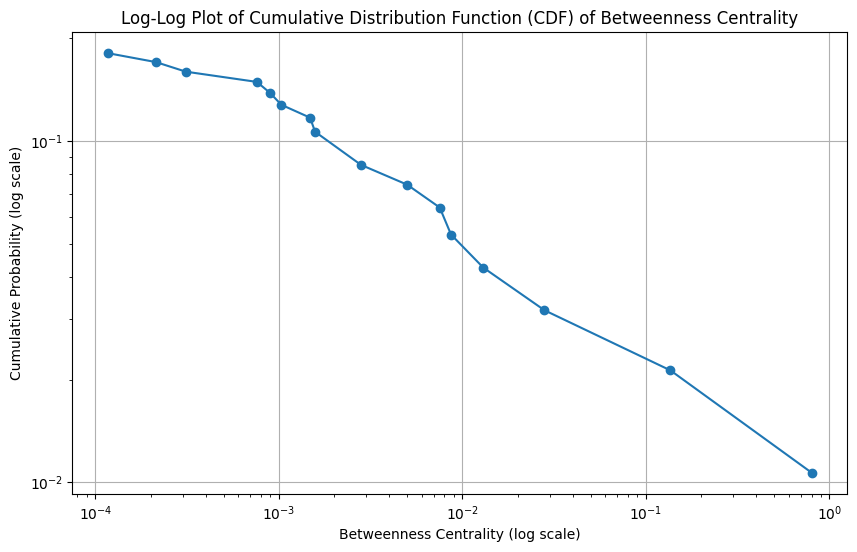

In [11]:
#This is the same code as above but we wanted to plot it with a log scale

def compute_cdf1(centrality):
    centrality_values = list(centrality.values())
    num_of = {}

    
    for i in centrality_values:
        if i not in num_of:
            num_of[i] = 1
        else:
            num_of[i] += 1 
            
    num_of = dict(sorted(num_of.items()))
    
    tot_number = sum(list(num_of.values()))
    e = {}
    
    
    for i in num_of:
        e[i] = num_of[i] / tot_number
    
    e_values = list(e.values())
    
    
    cd_x = list(e.keys())
    cd_y = []
    
   
    for k in range(len(e_values)):
        cd_y.append(sum(e_values[k:]))
    

    filtered_cd_x = [x for x in cd_x if x > 0]
    filtered_cd_y = [cd_y[i] for i in range(len(cd_y)) if cd_x[i] > 0]  

    
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_cd_x, filtered_cd_y, marker='o', linestyle='-')
    plt.xscale('log')  
    plt.yscale('log')  
    plt.xlabel('Betweenness Centrality (log scale)')
    plt.ylabel('Cumulative Probability (log scale)')
    plt.title('Log-Log Plot of Cumulative Distribution Function (CDF) of Betweenness Centrality')
    plt.grid()
    plt.show()


compute_cdf1(betweenness_values)



In [12]:
print(f"Number of nodes: {G.number_of_nodes()}")

Number of nodes: 94


### Conclusions for Week 3  

Remembering that the **cumulative distribution function** shows the sum of the frequencies of the values above a certain point, we can see from the graphs that:  
- There is a **significant difference** between the first two points and the last values.  
- In the middle, however, the spots are extremely close together because the majority of the points have only a **tiny difference** in their value.  

We can deduce (and also verify with a print) that many points have a **betweenness value of zero**, which explains the distance between the first point and the others.  


## WEEK 5  

### TASKS FOR WEEK 5  

#### PART 1 (PageRank)  

We are dealing with an **undirected graph**, so we needed to convert all the undirected links to directed ones. We decided to work on a copy of the graph, `G1`, transforming it into directed without affecting the original one.  

Tasks:  
1. **Run built-in PageRank** with α = 0.15, being careful about how to insert this data.  
2. **Identify the node with the highest PageRank** and compare it with the node from Week 3, providing a comparison.  
3. **Compute the cumulative distribution** for the PageRank and compare it with the Betweenness Centrality analyzed in Week 3, along with an explanation of the differences.  


In [13]:
G1= nx.DiGraph(G) #We made a directed copy of G 
pr = nx.pagerank(G1,alpha=(0.85)) # This function returns a dictionary
print(pr)

pr_values = pr.values() # Separately we saved the values of the dictionary
list_of_names=list(G1.nodes()) #We saved in a list the names of the characters (that are simply the nodes themselves)

{0: 0.00877265614898077, 1: 0.0027142411061206176, 2: 0.010423391123278352, 3: 0.006963039271549742, 4: 0.0070700481284419955, 5: 0.0057750584491364915, 6: 0.00877265614898077, 7: 0.006483829841637883, 8: 0.0075755100168257115, 9: 0.007675350757374081, 10: 0.0037073118302474745, 11: 0.004055919633318584, 12: 0.01068733227377383, 13: 0.01068733227377383, 14: 0.01068733227377383, 15: 0.020868615531084336, 16: 0.0038637458225351047, 17: 0.0071869875176556325, 18: 0.0026826119605857517, 19: 0.007518197658156643, 20: 0.007742973032005622, 21: 0.009711418784352962, 22: 0.0038637458225351047, 23: 0.005918711650628378, 24: 0.007381848804744394, 25: 0.0038011083858553053, 26: 0.0038637458225351047, 27: 0.0070700481284419955, 28: 0.0038011083858553053, 29: 0.004720512041348645, 30: 0.007093316921462256, 31: 0.004982242247804658, 32: 0.010484765775444176, 33: 0.00877265614898077, 34: 0.009988498598098982, 35: 0.20263875726478434, 36: 0.00877265614898077, 37: 0.0038011083858553053, 38: 0.004651150

In [14]:
value_max = max(pr_values) 
index_max = list(pr_values).index(value_max) 
name_max = list_of_names[index_max]  #Thanks to the previous index_max and value_max, we can select the name of the character with the highest value of the pagerank
print(f'And the node with the highest PageRank is:{character_name} (node {name_max}) with a PageRank value of: {value_max:.4f}.')

And the node with the highest PageRank is:FORREST (node 35) with a PageRank value of: 0.2026.


In [15]:
highest_betweenness_value = max(list(betweenness_values.values())) # We found the maximum value in the values of the betweenness and below we access to the index of the character with the highest betweenness value
for i in betweenness_values:
    if betweenness_values[i]==highest_betweenness_value:
        highest_betweenness = i
        break
print (f'Node with the highest betweenness: {character_name} (node {highest_betweenness}) with a betweenness value of: {highest_betweenness_value:.4f}.')


Node with the highest betweenness: FORREST (node 35) with a betweenness value of: 0.8073.


Searching inside the distributions, we conclude that the node with the highest betweeness is the node with the highest Pagerank too. This means that the most-present node in the graph's shortest paths is also the most-important linked page between its neighbors.

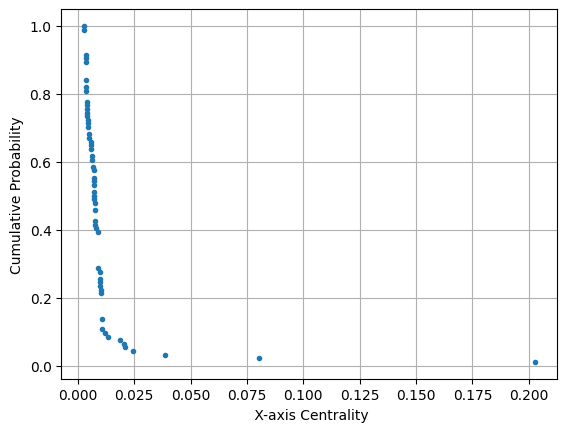

In [16]:
compute_cdf(pr)

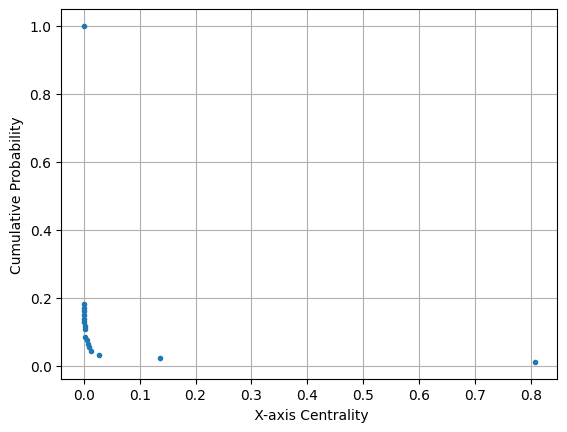

In [17]:
compute_cdf(betweenness_values)

##### COMMENT ABOUT THE COMPARISON  

Above we have compared the two graphs.  

- We can observe that both functions have a **similar slope along the curve**, indicating that the **betweenness** and **PageRank distributions** behave similarly.  
- Both show many values around 0 and more variation on the other values. This suggests that, while the two centrality measures are different, they still exhibit a **close relationship**.  

- The **betweenness distribution** is wider, reaching a peak of **0.8**.  
- The **PageRank distribution** is more concentrated, with a peak at **0.2**, implying that fewer nodes are highly ranked in terms of direct connections or influence.  

It’s important to remember that these are **two different centrality measures**, and we can properly analyze their differences in values because we have scaled the data from **0 to 1**.  


#### PART 2
In this part we were required to: 
1) Program our own function for the $k$-shell and the $k+1$ core, working for all possible value of k .

2) Represent, by plotting it, the $k+1$ core for a chosen k

In [18]:


def k_shell_and_k1_core(G, k):
    G_copy = G.copy()
    
    # iteratively we remove the nodes with degree less than k
    while True:
        # creation of the dictionary with the actual degree of nodes
        degree_dict = dict(G_copy.degree())
        
        # we find the nodes with a degree less than k
        nodes_to_remove = [node for node, degree in degree_dict.items() if degree < k]
        if not nodes_to_remove:
            break
        
        # we remove nodes with degree less than k
        G_copy.remove_nodes_from(nodes_to_remove)
    
    #we set up the k_core variable
    k_core = G_copy.copy()
    
    # we set up the k_shell as the difference with G nodes and the nodes inside k_core
    k_shell = [node for node in G.nodes if node not in k_core.nodes()]
    
    return k_shell, k_core


After having created our function, we had to choose a value for **k**, and in order to do this, we looked at the **average degree** of our nodes in the graph.  

- We noticed that the average degree was about **6**, so we used **k=6** to understand:  
  - How many nodes are in the **k+1 core**.  
  - Which nodes were in the **k shell**.  

- After additional attempts, we also obtained information for:  
  - **k=45**, identifying the node of **Jenny**.  
  - **k=89**, identifying the node of **Forrest**.  

In the end, we plotted the **k+1 core**.  


In [19]:
k = 6 

k_shell, k1_core = k_shell_and_k1_core(G, k)

print(f"Nodes in the {k}-shell:", k_shell)
print(f"Number of nodes in the {k+1}-core:", len(k1_core.nodes()))

Nodes in the 6-shell: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 37, 38, 42, 43, 44, 45, 47, 50, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 87, 89, 90, 91, 92, 93]
Number of nodes in the 7-core: 27


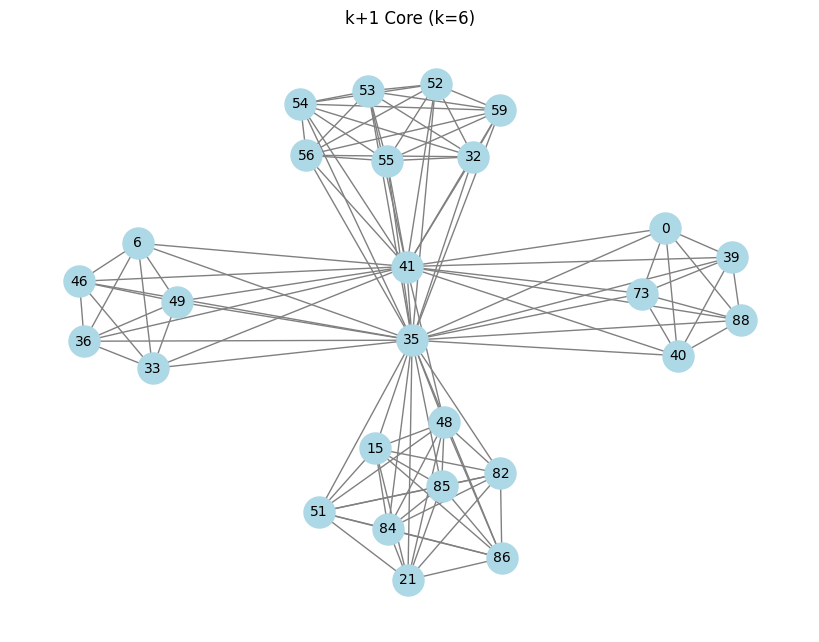

In [20]:
plt.figure(figsize=(8, 6))
nx.draw(k1_core, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title(f"k+1 Core (k={k})")
plt.show()

# WEEK 6 


### TASK FOR WEEK 6 
For this week we had a list of tasks regarding the community detection and the partitions.


### FIRST TASK  

For all this part, we had to treat our graph as **undirected and unweighted**, deleting all the loops and working only with the **largest connected component**.  

1. We had to implement the following three techniques for community detection (using the **NetworkX built-in functions**):  

    a) **Bridge removal** (considering the partition with the highest modularity).  

    b) **Modularity optimization**.  

    c) **Label propagation**.  



True


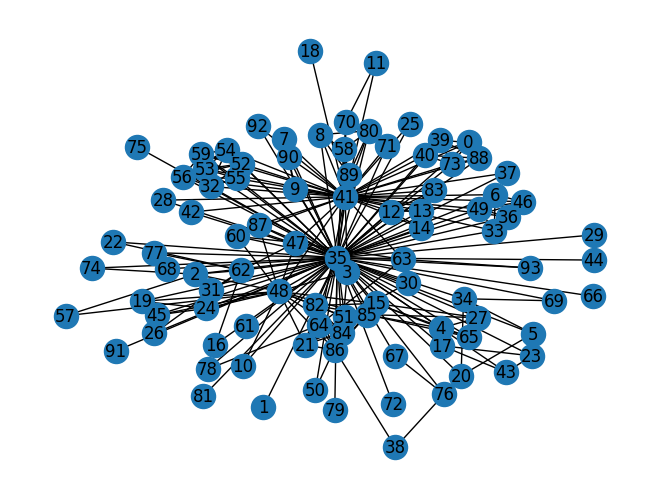

In [21]:
print(nx.is_connected(G)) # This line tells us with a boolean output that the graph is connected

G2= G.copy()
G2.remove_edges_from(nx.selfloop_edges(G2)) # We are currently working on G2, that's a copy of the original graph but without self loops
nx.draw(G2,with_labels='True') # We plot the resulting graph without loops 



## Bridge Removal

 Below we are calculating the partition with the highest modularity for the bridge removal.

In [22]:
partitions = nx.community.girvan_newman(G2)
# We generated partitions of the graph G2 using the Girvan-Newman community detection nx function

t1_br = time.time()  # This will be useful after, when we're gonna print out the computational time for each of this technique 

#  We set up the variables like ' best partition' and 'highest modularity'  with the aim to track the partition with the highest modularity 
best_partition = None
highest_modularity = -1  # This variable has a very low value to ensure the best highest modularity 

# we iterated over each partition and calculate its modularity
for partition in partitions:
    modularity = nx.community.modularity(G2, partition)
    # we calculated the modularity of the current partition and if the considered partition's modularity is the highest so fare. you need to update the 'best_partition' and the ' highest_modularity' 

    if modularity > highest_modularity:
        highest_modularity = modularity
        best_partition = partition


# We converted the best partition to frozensets
if best_partition is not None:
    best_partition_frozensets = [frozenset(comm) for comm in best_partition]
    print(f"Partition with the highest modularity: {best_partition}")
    print(f"The maximum modularity: {highest_modularity}")
    print(best_partition_frozensets)

t2_br = time.time()



Partition with the highest modularity: ({0, 39, 40, 73, 88}, {1}, {57, 2, 74}, {3}, {65, 4, 15, 82, 51, 84, 85, 21, 86, 27}, {34, 69, 5, 38, 20}, {33, 36, 6, 46, 49}, {9, 90, 7}, {8, 89, 58, 80}, {10, 45, 48, 19, 24}, {11, 70, 71}, {83, 12, 13, 14}, {16}, {17, 43, 23}, {18}, {77, 22, 26, 62, 31}, {25}, {28}, {44, 29}, {30}, {32, 35, 41, 52, 53, 54, 55, 56, 59}, {37}, {42}, {60, 87, 47}, {50}, {61}, {93, 63}, {64, 78}, {66}, {67, 76}, {68}, {72}, {75}, {79}, {81}, {91}, {92})
The maximum modularity: 0.257201793865109
[frozenset({0, 39, 40, 73, 88}), frozenset({1}), frozenset({57, 2, 74}), frozenset({3}), frozenset({65, 4, 15, 82, 51, 84, 85, 21, 86, 27}), frozenset({34, 20, 69, 5, 38}), frozenset({33, 49, 36, 6, 46}), frozenset({9, 90, 7}), frozenset({8, 89, 58, 80}), frozenset({48, 19, 24, 10, 45}), frozenset({11, 70, 71}), frozenset({83, 12, 13, 14}), frozenset({16}), frozenset({17, 43, 23}), frozenset({18}), frozenset({22, 26, 77, 62, 31}), frozenset({25}), frozenset({28}), frozenset

## Modularity optimization


In [23]:
t1_mod = time.time()  # This will be useful for the computational time 
partition_mod = nx.community.greedy_modularity_communities(G2) # We're detecting communities in the graph G2 using the asynchronous label propagation algorithm
t2_mod = time.time() 
print(partition_mod)

[frozenset({1, 5, 16, 17, 20, 22, 23, 26, 29, 31, 34, 35, 38, 43, 44, 61, 62, 63, 64, 66, 67, 68, 69, 72, 75, 76, 77, 78, 79, 81, 91, 93}), frozenset({65, 2, 3, 4, 74, 10, 15, 82, 19, 84, 21, 85, 86, 24, 27, 30, 45, 48, 50, 51, 57}), frozenset({70, 7, 8, 71, 9, 11, 12, 13, 14, 80, 18, 83, 25, 89, 90, 28, 92, 37, 41, 42, 58}), frozenset({32, 52, 53, 54, 55, 56, 59}), frozenset({33, 49, 36, 6, 46}), frozenset({0, 39, 40, 73, 88}), frozenset({60, 87, 47})]


## Label propagation

In [24]:
t1_lp = time.time()  # This will be useful for the computational time 
communities = nx.community.asyn_lpa_communities(G2)  # We're detecting all the communities in G2
partition_lp = [frozenset(c) for c in communities]  # We're converting each community into a frozenset and store all communities in a list called 'partition_lp'
t2_lp = time.time() 
print(partition_lp)

[frozenset({0, 39, 40, 73, 88}), frozenset({64, 1, 66, 68, 70, 71, 72, 75, 12, 13, 14, 78, 79, 81, 83, 22, 25, 91, 28, 93, 30, 35, 37, 50, 61, 63}), frozenset({57, 2, 74}), frozenset({3, 10, 15, 48, 82, 51, 84, 21, 85, 86}), frozenset({65, 27, 4}), frozenset({34, 20, 69, 5, 38}), frozenset({33, 49, 36, 6, 46}), frozenset({7, 8, 9, 11, 80, 18, 87, 89, 90, 92, 32, 41, 42, 47, 52, 53, 54, 55, 56, 58, 59, 60}), frozenset({16, 26, 77, 62, 31}), frozenset({17, 43, 23}), frozenset({24, 19, 45}), frozenset({44, 29}), frozenset({67, 76})]


## THE SECOND TASK  

We were required to make comparisons with the results of each technique in terms of:  

a) **Number of detected clusters**  

b) **Cluster size distribution**  

c) **Computational time**  

d) **Modularity**  

---

Then, we needed to present all the results in a **table**, together.  




In [25]:


#Here we are calculating the number of detected clusters: we just take the length of each partition for each topological similarity
dc_bridgeremoval = len(best_partition)
dc_modularity_opt = len(partition_mod)
dc_label_p = len(partition_lp)
print(f"Number of clusters (Girvan-Newman): {dc_bridgeremoval}")
print(f"Number of clusters (Greedy Modularity)  {dc_modularity_opt}")
print(f"Number of clusters (Label Propagation): {dc_label_p}")


#We have calculated the modularity for each community detection technique using NetworkX's modularity function

modularity_br = nx.community.modularity(G2, best_partition)
modularity_mo = nx.community.modularity(G2, partition_mod)
modularity_lp = nx.community.modularity(G2, partition_lp) 
print("The modularities for the three techniques are:" , modularity_br, modularity_mo, modularity_lp)

# Below we calculated cluster size distribution 
cluster_sizes_br = [len(c) for c in best_partition] # List of sizes for each community detected by the bridge removal technique
cluster_sizes_mo = [len(c) for c in partition_mod] # List of sizes for each community detected by the modularity optimization technique
cluster_sizes_lp = [len(c) for c in partition_lp] # List of sizes for each community detected by the label propagation technique
print(f"Cluster size distribution (Girvan-Newman): {cluster_sizes_br}")
print(f"Cluster size distribution (Greedy Modularity): {cluster_sizes_mo}")
print(f"Cluster size distribution (Label Propagation): {cluster_sizes_lp}")

# Lastly we have the computational time 
computational_time_br = t2_br - t1_br
computational_time_mod = t2_mod - t1_mod
computational_time_lp = t2_lp - t1_lp
print ('The computational time for bridge removal is:',computational_time_br,'seconds' )
print ('The computational time for modularity optimization is:',computational_time_mod,'seconds'  )
print ('The computational time for label propagation is:',computational_time_lp,'seconds'  )






Number of clusters (Girvan-Newman): 37
Number of clusters (Greedy Modularity)  7
Number of clusters (Label Propagation): 13
The modularities for the three techniques are: 0.257201793865109 0.3728973155861981 0.32069328736952984
Cluster size distribution (Girvan-Newman): [5, 1, 3, 1, 10, 5, 5, 3, 4, 5, 3, 4, 1, 3, 1, 5, 1, 1, 2, 1, 9, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1]
Cluster size distribution (Greedy Modularity): [32, 21, 21, 7, 5, 5, 3]
Cluster size distribution (Label Propagation): [5, 26, 3, 10, 3, 5, 5, 22, 5, 3, 3, 2, 2]
The computational time for bridge removal is: 1.4731042385101318 seconds
The computational time for modularity optimization is: 0.01583266258239746 seconds
The computational time for label propagation is: 0.0 seconds


# FIRST COMMENTS  

- **REGARDING THE NUMBER OF CLUSTERS**:  
  The best result is given by the **Modularity Optimization** with 7 clusters (but also from the **Label Propagation**).  

- **REGARDING THE MODULARITIES FOR EACH ALGORITHM**:  
  The method with the highest value is the **Modularity Optimization**.  

- **REGARDING THE CLUSTER SIZE DISTRIBUTION**:  
  As with the number of clusters, we obtain the best results from the **Modularity Optimization** and the **Label Propagation**.  

- **REGARDING THE COMPUTATIONAL TIME**:  
  The fastest method is **Label Propagation**, followed by **Modularity Optimization** and **Bridge Removal**.  

- **REGARDING THE NMI** (we analyzed it later):  
  The highest value is given by the comparison between the **Modularity Optimization** and the **Label Propagation**.  




In [26]:

results_df = pd.DataFrame({
    'Technique': ['Girvan-Newman/Bridge Removal', 'Greedy Modularity', 'Label Propagation'],
    'Number of Detected Clusters': [dc_bridgeremoval, dc_modularity_opt, dc_label_p],
    'Cluster Size Distribution': [cluster_sizes_br, cluster_sizes_mo, cluster_sizes_lp],
    'Computational Time (seconds)': [t2_br - t1_br, t2_mod - t1_mod, t2_lp - t1_lp],
    'Modularity': [modularity_br, modularity_mo, modularity_lp]
}) # We used the built-in function of pandas for the dataframe
results_df.index = range(1, len(results_df) + 1)  #We are starting the indexing from 1 for a clearer readable table 

styled_df = results_df.style.set_table_attributes('style="width:100%; border-collapse:collapse;"') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#1f2d76'), ('color', '#ddd'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }]) # We are styling the DataFrame

styled_df


### INTERPRETATION  

### 1. The Number of Clusters  

There's a huge difference between **Bridge Removal** and the two algorithms after:  
- **Bridge Removal** detects **37 clusters**.  
- **Modularity Optimization** detects **7 clusters**.  
- **Label Propagation** detects different communities each time (around **10 clusters**).  

The larger number of clusters detected by **Bridge Removal** suggests a more granular separation of nodes.  

In contrast, the other methods resulted in a more consolidated view of the network, with fewer clusters. This indicates that these methods group nodes more closely based on their connectivity.  

---

### 2. The Modularity Scores  

Modularity scores indicate the strength of the division of the network into clusters:  
- **Higher modularity scores** suggest that the partitioning captures the community structure more effectively.  

**Results**:  
- **Greedy Modularity**: Achieved the highest modularity score (**0.372**), indicating a very well-defined community structure. The clusters identified are more distinct compared to other methods.  
- **Label Propagation**: Its score suggests moderate effectiveness in clustering.  
- **Girvan-Newman**: The lowest score (**0.257**) indicates that its many clusters may not be well-separated.  

---

### 3. The Cluster Size Distribution  

- **Girvan-Newman**:  
  - Cluster sizes vary widely, with many small clusters (e.g., size **1**) and a maximum cluster size of **10**.  

- **Greedy Modularity**:  
  - Cluster sizes are more balanced, with the biggest cluster having **32 nodes**, suggesting that many nodes are grouped together.  

- **Label Propagation**:  
  - Shows variation, with a maximum cluster size of **48**, indicating that it can also create large clusters.  

**Interpretation**:  
- The **Bridge Removal** method creates many small and less meaningful clusters, which complicates the interpretation of the network structure.  
- **Greedy Modularity's** balanced cluster sizes point to a more stable structure.  
- **Label Propagation's** largest cluster suggests a tendency to merge groups of nodes with strong connections.  

---

### 4. The Computational Time  

The computational time varies with each "run all," depending on various factors. Generally:  

- **Bridge Removal**: **0.855 seconds**  
- **Modularity Optimization**: **0.013 seconds**  
- **Label Propagation**: **0.005 seconds**  

**Final Insights**:  
- The **Bridge Removal method**, relying on iterative edge removal, is computationally intensive and takes significantly longer than the other two methods.  
- **Greedy Modularity** and **Label Propagation** are much faster, with **Label Propagation** being the fastest. This efficiency makes these methods more practical for larger networks.  




## Conclusion: Which Method we consider the Best?
Considering the combination of modularity scores, cluster sizes, and computational efficiency, Greedy Modularity appears to be the best option for this analysis. It has great values (such as the high modularity value) that indicates a strong community structure and it produces a good number of clusters that are cohesive.

 Girvan-Newman is a method to avoid in this case for its low modularity score and its high computational time, because it becomes less practical for large network. 
 Also the Label Propagation , despite its speed and the reasonable modularity score, it's not suggested because the cluster size may oversimplify the network structure. 


### Plotting the partition for the Greedy Modularity 
As we already said, Greedy Modularity has the highest modularity score (0.372), indicating strong internal connections and clear separations between different communities. We chose it as the best method, and below we are plotting it. 

In [27]:
partition_map = {}  # We stored an empty dictionary that will map nodes to their corresponding clusters
for idx, cluster_nodes in enumerate(partition_mod): #For each node in the current cluster 
    for node in cluster_nodes:
        partition_map[node] = idx # We assign the current cluster index (idx) to each node in the partition_map

partition_map

{1: 0,
 5: 0,
 16: 0,
 17: 0,
 20: 0,
 22: 0,
 23: 0,
 26: 0,
 29: 0,
 31: 0,
 34: 0,
 35: 0,
 38: 0,
 43: 0,
 44: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 72: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 81: 0,
 91: 0,
 93: 0,
 65: 1,
 2: 1,
 3: 1,
 4: 1,
 74: 1,
 10: 1,
 15: 1,
 82: 1,
 19: 1,
 84: 1,
 21: 1,
 85: 1,
 86: 1,
 24: 1,
 27: 1,
 30: 1,
 45: 1,
 48: 1,
 50: 1,
 51: 1,
 57: 1,
 70: 2,
 7: 2,
 8: 2,
 71: 2,
 9: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 80: 2,
 18: 2,
 83: 2,
 25: 2,
 89: 2,
 90: 2,
 28: 2,
 92: 2,
 37: 2,
 41: 2,
 42: 2,
 58: 2,
 32: 3,
 52: 3,
 53: 3,
 54: 3,
 55: 3,
 56: 3,
 59: 3,
 33: 4,
 49: 4,
 36: 4,
 6: 4,
 46: 4,
 0: 5,
 39: 5,
 40: 5,
 73: 5,
 88: 5,
 60: 6,
 87: 6,
 47: 6}

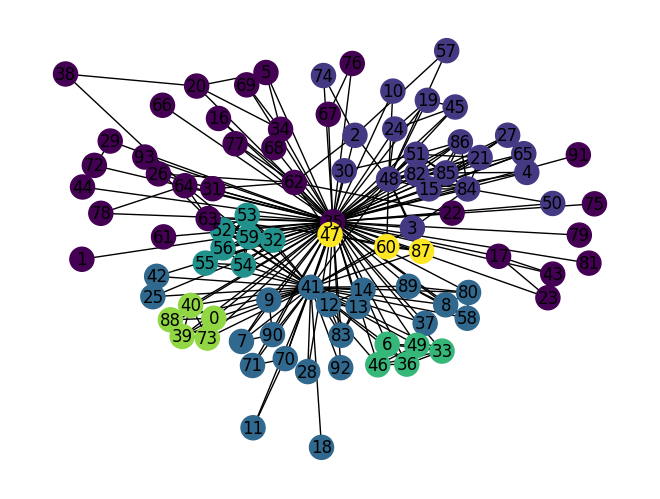

In [28]:
#plotting the partition in a very simple way
node_colors = [partition_map[n] for n in G2.nodes]
nx.draw(G2, node_color = node_colors, with_labels = True)

Below we tried to represent and plot the same partition but using a more complex code that we tried to explain line by line. It provides a graph where you can also move and see better each part. 

C:\Users\alicr\AppData\Local\Temp\ipykernel_31556\2377746838.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


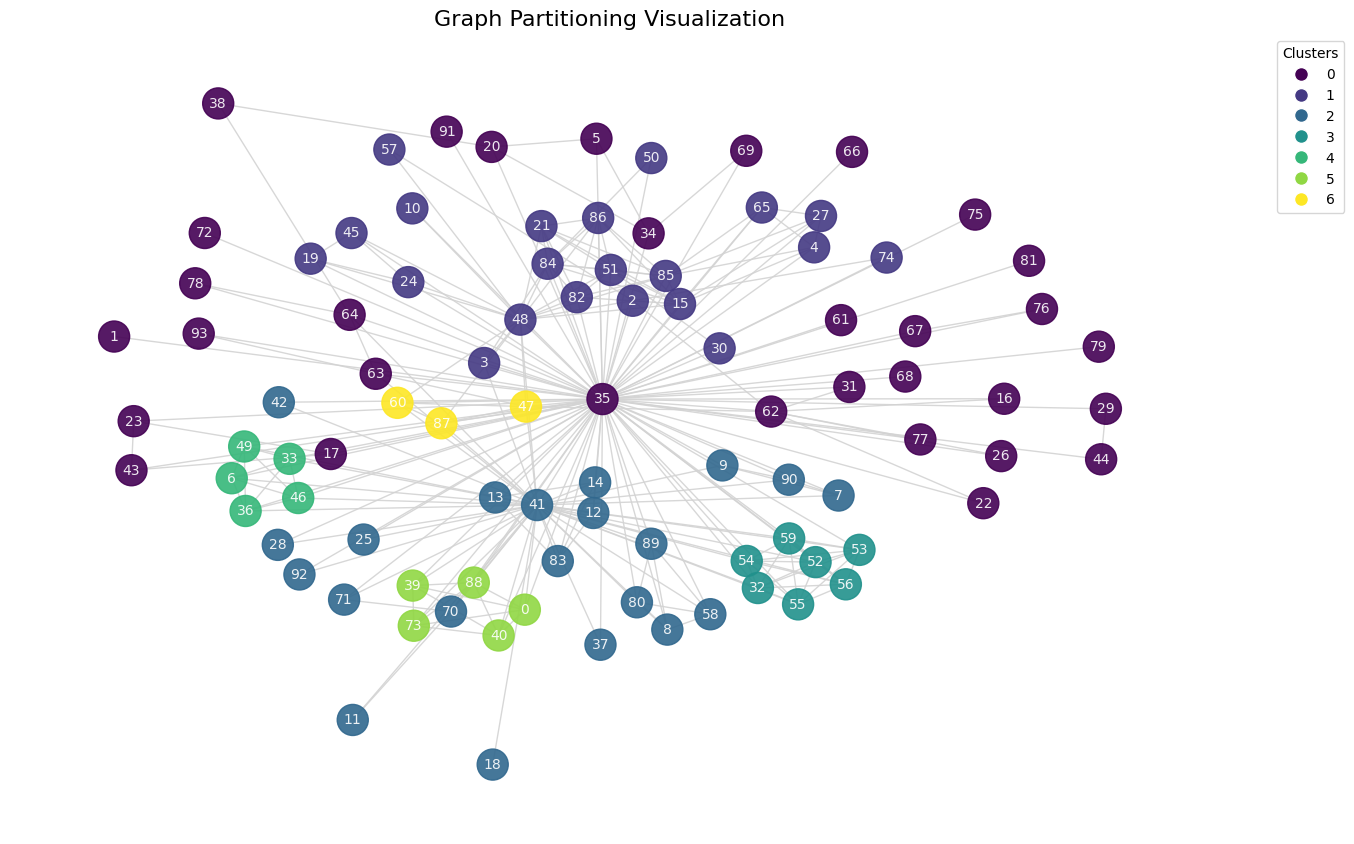

In [29]:

# We set the size of the figure to make it larger for better visibility
plt.figure(figsize=(12, 8))

# We create a list of unique clusters from the partition_map values to distinguish them
unique_clusters = list(set(partition_map.values()))

# We create a colormap using the Viridis color scheme, with a number of colors equal to the number of unique clusters
colors = plt.cm.get_cmap('viridis', len(unique_clusters))  

# We assign colors to each node based on the cluster it belongs to using the partition_map
node_colors = [colors(partition_map[n]) for n in G2.nodes]

# We draw the graph G2 with specified parameters
nx.draw(G2, node_color=node_colors, with_labels=True, 
        node_size=500,  # We set the size of the nodes
        font_size=10,   # We set the font size for the labels
        font_color='white',  # We specify the font color for the labels
        edge_color='lightgray',  # We set the color of the edges
        linewidths=1,  # We set the thickness of the edges
        alpha=0.9)  # We set the transparency of the nodes

# We add a legend to the plot to explain the color coding of clusters
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors(i), markersize=10) for i in unique_clusters]
plt.legend(handles, unique_clusters, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# We set the title of the plot to give context about what is being visualized
plt.title('Graph Partitioning Visualization', fontsize=16)

# We hide the axes to make the visualization cleaner
plt.axis('off')  

# We display the plot to the user
plt.show()


In [30]:
nx.set_node_attributes(G2,partition_map,'Community_mod')

In [31]:
nx.write_gexf(G2, "test.gexf") # This line of code  was required to plot the graph on giphy 

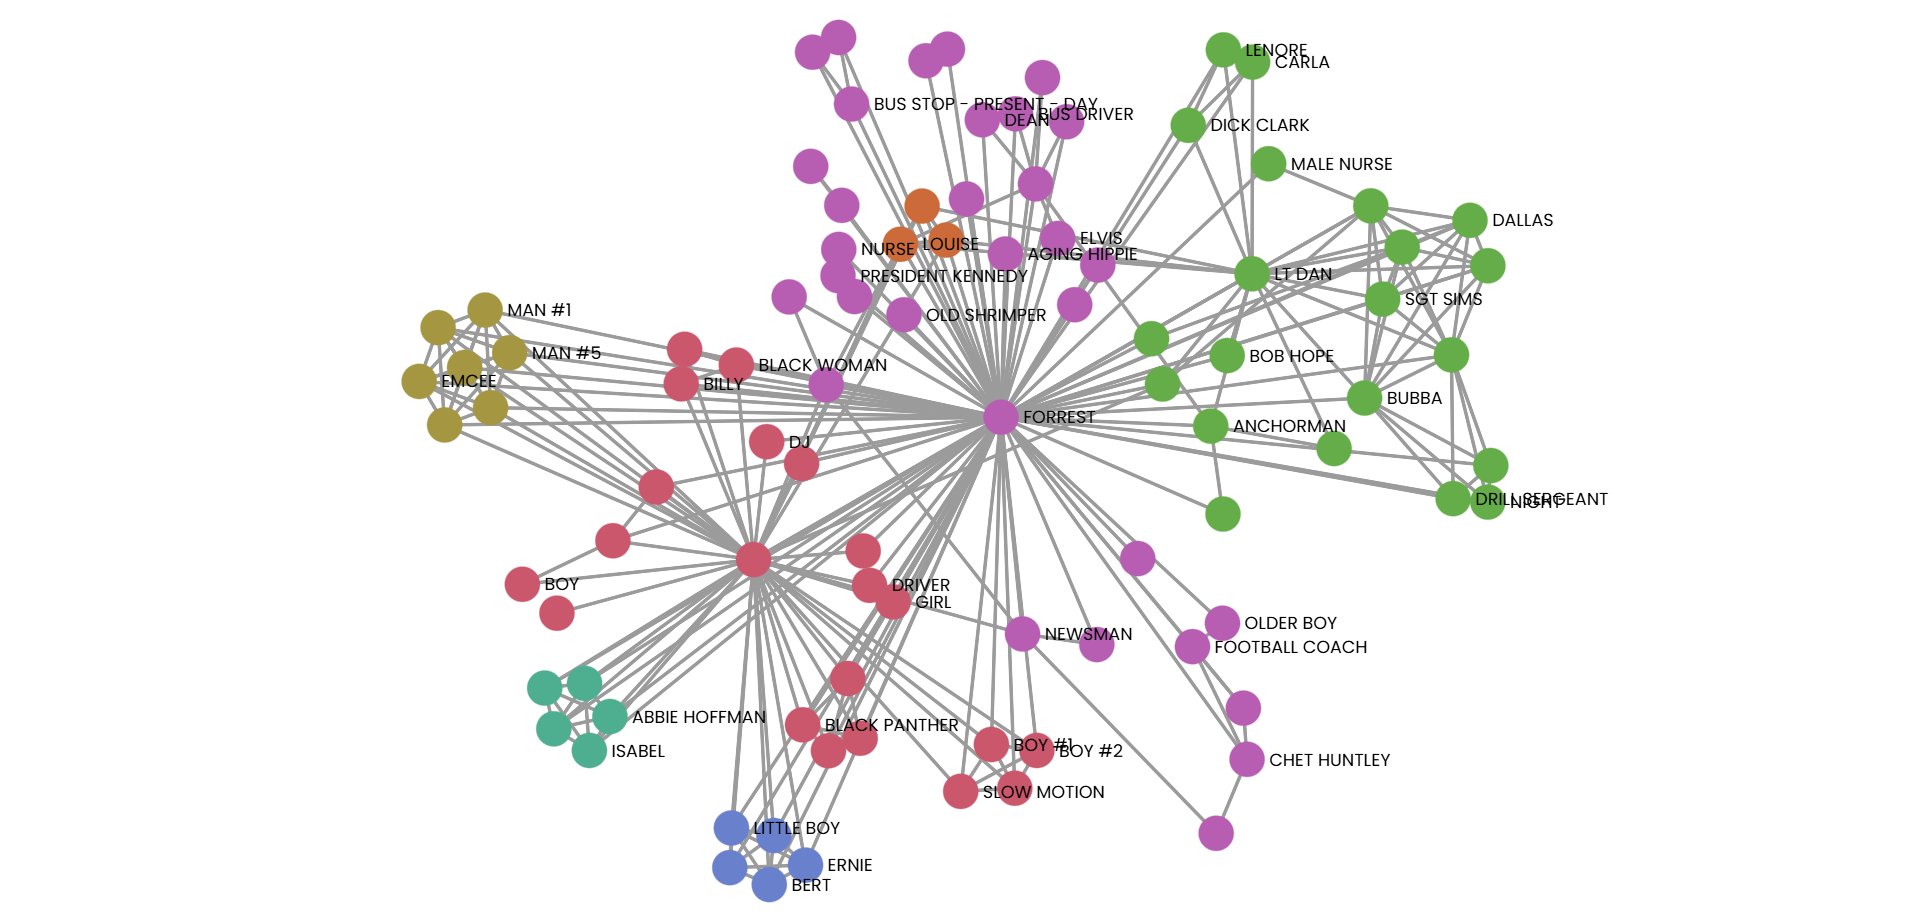

### NMI and Consideration on It  

We also chose to represent the optional **NMI**, so we wrote the code and printed out the results. The **Normalized Mutual Information (NMI)** is a useful metric for assessing clustering quality.  

To ensure operability:  
- Vectors must have the **same node order**.  
- We sort the node list of `G2` and, for each node and technique, check its cluster membership, incrementing the community count when a node is found in a cluster.  

An **NMI of 1** indicates perfect labeling.  
In the code below, we observe **float values in the range of (0.62, 0.65)**, suggesting **average clustering quality**.  



In [32]:
# We initialize empty dictionaries to hold the partition mappings for the different methods
partition_map_gn = {}  # for the Girvan-Newman method
partition_map_mo = {}  # for the Greedy Modularity method
partition_map_lp = {}  # for the Label Propagation method

# We initialize lists to store the cluster indices for each node for the  different methods
cluster_vector_gn = []  # for Girvan-Newman
cluster_vector_mo = []  # for Greedy Modularity
cluster_vector_lp = []  # for Label Propagation

# We sorted nodes to ensure that the order of the nodes remains the same each time we run the code
sorted_nodes_G2 = sorted(G2.nodes())

# We iterate through each node in the sorted list of nodes
for node in sorted_nodes_G2:
    count_gn = 0  # We initialize a counter for each of the methods 
    count_mo = 0  
    count_lp = 0
    # We do a check of membership in the best_partition for Girvan-Newman
    for cluster in best_partition:
        for member in cluster:
            if member == node:
                cluster_vector_gn.append(count_gn)  # We append the index of the cluster
                partition_map_gn[node] = count_gn  # We map the node to its cluster index
        count_gn += 1  # We increment the counter for the next cluster

    # We do a check for membership in the partition_mod for Greedy Modularity
    for cluster in partition_mod:
        for member in cluster:
            if member == node:
                cluster_vector_mo.append(count_mo)  # We append the index of the cluster
                partition_map_mo[node] = count_mo  # We map the node to its cluster index
        count_mo += 1  # We increment the counter for the next cluster

    # We do a check for membership in the partition_lp for Label Propagation
    for cluster in partition_lp:
        for member in cluster:
            if member == node:
                cluster_vector_lp.append(count_lp)  # We append the index of the cluster
                partition_map_lp[node] = count_lp  # We map the node to its cluster index
        count_lp += 1  # We increment the counter for the next cluster

print(cluster_vector_gn)
print(cluster_vector_mo)
print(cluster_vector_lp)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 9, 10, 11, 11, 11, 4, 12, 13, 14, 9, 5, 4, 15, 13, 9, 16, 15, 4, 17, 18, 19, 15, 20, 6, 5, 20, 6, 21, 5, 0, 0, 20, 22, 13, 18, 9, 6, 23, 9, 6, 24, 4, 20, 20, 20, 20, 20, 2, 8, 20, 23, 25, 15, 26, 27, 4, 28, 29, 30, 5, 10, 10, 31, 0, 2, 32, 29, 15, 27, 33, 8, 34, 4, 11, 4, 4, 4, 23, 0, 8, 7, 35, 36, 26]
[5, 0, 1, 1, 1, 0, 4, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 3, 4, 0, 0, 4, 2, 0, 5, 5, 2, 2, 0, 0, 1, 4, 6, 1, 4, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 6, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 5, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 6, 5, 2, 2, 0, 2, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 3, 7, 1, 1, 1, 3, 8, 9, 7, 10, 5, 3, 1, 9, 10, 1, 8, 4, 1, 11, 1, 8, 7, 6, 5, 1, 6, 1, 5, 0, 0, 7, 7, 9, 11, 10, 6, 7, 3, 6, 1, 3, 7, 7, 7, 7, 7, 2, 7, 7, 7, 1, 8, 1, 1, 4, 1, 12, 1, 5, 1, 1, 1, 0, 2, 1, 12, 8, 1, 1, 7, 1, 3, 1, 3, 3, 3, 7, 0, 7, 7, 1, 7, 1]


In [33]:
#NMI computation:

NMI_for_gn = normalized_mutual_info_score(cluster_vector_gn , cluster_vector_mo)
NMI_for_mo = normalized_mutual_info_score(cluster_vector_gn , cluster_vector_lp)
NMI_for_lp = normalized_mutual_info_score(cluster_vector_mo, cluster_vector_lp)

print("The Normalized Mutual Information Scores for the three techniques are:" , NMI_for_gn, NMI_for_mo, NMI_for_lp)

The Normalized Mutual Information Scores for the three techniques are: 0.6397687004141002 0.7242153885612004 0.6197965499800281


## WEEK 7 


For the week 7, we were required to perform some tasks on link predictions using different similarities approaches. 
The first thing to do was to treat our graph (already undirected) as unweighted and working on the resulting largest connected component(removing loops). 

So we are creating a copy of our Graph G, to make our work clearer; then we define the function for the CN computation without using the NetworkX built in functions as required 

In [34]:
# Remove loops from the graph after creating a copy
G_copy = G.copy()
G_copy.remove_edges_from(nx.selfloop_edges(G_copy))

def compute_cn_and_pa(Graph):
    # Get node labels from the 'label' attribute
    node_labels = {node: Graph.nodes[node].get('label', str(node)) for node in Graph.nodes}

    # Initialize the data dictionary
    data = {
        'First Node': [],  # Replacing "First Index" with node names
        'Second Node': [], # Replacing "Second Index" with node names
        'Common Neighbors': [],
        'Preferential Attachment': []
    }

    # Compute CN and PA for non-edges
    for u, v in nx.non_edges(Graph):
        neighbors_u = set(Graph.neighbors(u))
        neighbors_v = set(Graph.neighbors(v))
        common_neighbors = len(neighbors_u.intersection(neighbors_v))
        
        # Append node names instead of indices
        data['First Node'].append(node_labels[u])
        data['Second Node'].append(node_labels[v])
        data['Common Neighbors'].append(common_neighbors)
        
        # Compute Preferential Attachment (PA)
        pa_score = next((score for x, y, score in nx.preferential_attachment(Graph, [(u, v)])), 0)
        data['Preferential Attachment'].append(pa_score)

    # Create the DataFrame
    df = pd.DataFrame(data)
    df.set_index(['First Node', 'Second Node'], inplace=True)

    # Add the sum of CN and PA
    df['Sum (CN + PA)'] = df['Common Neighbors'] + df['Preferential Attachment']
    
    return df

# Compute the missing links DataFrame
df_missing_links = compute_cn_and_pa(G_copy)

# Print the DataFrame with node names
print(df_missing_links)


                               Common Neighbors  Preferential Attachment  \
First Node    Second Node                                                  
ABBIE HOFFMAN AGING HIPPIE                    1                        6   
              ANCHORMAN                       1                       30   
              ANNOUNCER                       2                       24   
              ANOTHER DAY                     1                       30   
              ASSISTANT COACH                 1                       18   
...                                         ...                      ...   
WHITE WOMAN   YOUNG HIPPIE                    2                        8   
              YOUNG MAN                       1                        8   
WILD-EYED MAN YOUNG HIPPIE                    1                        2   
              YOUNG MAN                       1                        2   
YOUNG HIPPIE  YOUNG MAN                       1                        4   

           

## THE TASKS  

1. As we have done above, we have created our own function for computing the **CN**, and we have chosen the **PA** as the topological index.  

2. The second task involved adding another column with the **sum of the two indices** (we did this inside our `compute_cn_and_pa` function).  

3. The third task required a **rescale of all the columns** (between 0 and 1) to allow us to compute the arithmetic mean. Based on our three scores (**CN**, **PA**, and **Mean**), we needed to identify, as missing links, the **node pairs yielding the largest 5/10 values** and comment on them.  

4. We also decided to complete the **optional part** by adding a new score, the **max score**, to be used for comparing the results.  


In [35]:
#here we apply the rescaling and the normalization to the columns of the dataframe
def min_max_scale(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_df = df_missing_links[['Common Neighbors', 'Preferential Attachment']].transform(min_max_scale)
print(scaled_df) 


                               Common Neighbors  Preferential Attachment
First Node    Second Node                                               
ABBIE HOFFMAN AGING HIPPIE             0.333333                 0.010121
              ANCHORMAN                0.333333                 0.058704
              ANNOUNCER                0.666667                 0.046559
              ANOTHER DAY              0.333333                 0.058704
              ASSISTANT COACH          0.333333                 0.034413
...                                         ...                      ...
WHITE WOMAN   YOUNG HIPPIE             0.666667                 0.014170
              YOUNG MAN                0.333333                 0.014170
WILD-EYED MAN YOUNG HIPPIE             0.333333                 0.002024
              YOUNG MAN                0.333333                 0.002024
YOUNG HIPPIE  YOUNG MAN                0.333333                 0.006073

[4100 rows x 2 columns]


In [ ]:
# after the rescale we computed the mean and added to our dataframe 
mean_score = scaled_df.aggregate(np.mean, axis = 1)
df_missing_links['Mean Score'] = mean_score

df_missing_links['Max Score'] = df_missing_links[['Common Neighbors', 'Preferential Attachment']].max(axis=1)


print(df_missing_links)


                               Common Neighbors  Preferential Attachment  \
First Node    Second Node                                                  
ABBIE HOFFMAN AGING HIPPIE                    1                        6   
              ANCHORMAN                       1                       30   
              ANNOUNCER                       2                       24   
              ANOTHER DAY                     1                       30   
              ASSISTANT COACH                 1                       18   
...                                         ...                      ...   
WHITE WOMAN   YOUNG HIPPIE                    2                        8   
              YOUNG MAN                       1                        8   
WILD-EYED MAN YOUNG HIPPIE                    1                        2   
              YOUNG MAN                       1                        2   
YOUNG HIPPIE  YOUNG MAN                       1                        4   

           

C:\Users\alicr\AppData\Local\Temp\ipykernel_31556\2886171199.py:2: FutureWarning: The provided callable <function mean at 0x0000027951F88860> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_score = scaled_df.aggregate(np.mean, axis = 1)


In [37]:
# We try to use a different way from the one showed in the ipynb file of the week 7 and it gives the same results.

# We found out the 10 largest values for each score and we listed the scores in separate lists to print them out
top_cn = df_missing_links.nlargest(10, 'Common Neighbors')
top_pa = df_missing_links.nlargest(10, 'Preferential Attachment')
top_mean = df_missing_links.nlargest(10, 'Mean Score')
top_max = df_missing_links.nlargest(10, 'Max Score')


# We extract the node pairs from the results aftering having sorted them 
common_neighbors_links = sorted(list(top_cn.index))
preferential_attachment_links = sorted(list(top_pa.index))
mean_score_links = sorted(list(top_mean.index))
max_score_links = sorted(list(top_max.index))


print(f"For the Common Neighbor score the missing links are : {common_neighbors_links}")
print(f"For the Preferential attachment index score the missing links are : {preferential_attachment_links}")
print(f"For the Mean Score the missing links are : {mean_score_links}")
print(f"For the Max Score the missing links are : {max_score_links}")


For the Common Neighbor score the missing links are : [('ANCHORMAN', 'LOUISE'), ('ANNOUNCER', 'BUBBA'), ('ANNOUNCER', 'DALLAS'), ('ANNOUNCER', 'LOUISE'), ('ANNOUNCER', 'MAN'), ('ANNOUNCER', 'MINISTER'), ('ANNOUNCER', 'SGT SIMS'), ('ANNOUNCER', 'SONG'), ('ANNOUNCER', 'STRONGARM'), ('ANNOUNCER', 'SUSAN')]
For the Preferential attachment index score the missing links are : [('ANCHORMAN', 'JENNY'), ('ANOTHER DAY', 'JENNY'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENNY'), ('JENNY', 'MAN'), ('JENNY', 'MRS GUMP'), ('JENNY', 'SGT SIMS'), ('JENNY', 'SOLDIER'), ('JENNY', 'SONG'), ('JENNY', 'STRONGARM')]
For the Mean Score the missing links are : [('ANOTHER DAY', 'LT DAN'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENNY'), ('JENNY', 'MAN'), ('JENNY', 'MRS GUMP'), ('JENNY', 'SGT SIMS'), ('JENNY', 'SOLDIER'), ('JENNY', 'SONG'), ('JENNY', 'STRONGARM'), ('LT DAN', 'MRS GUMP')]
For the Max Score the missing links are : [('ANCHORMAN', 'JENNY'), ('ANOTHER DAY', 'JENNY'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENNY'), ('JENNY

In [38]:
#we used the code provided by the ipynb file , and it computes the same things as above
ranked_df = df_missing_links.rank(axis = 0, method = 'first',ascending =False)

CN_pred = ranked_df[ranked_df['Common Neighbors'] <= 10].index.to_list()
PA_pred = ranked_df[ranked_df['Preferential Attachment'] <= 10].index.to_list()
mean_pred = ranked_df[ranked_df['Mean Score'] <= 10].index.to_list()
max_pred = ranked_df[ranked_df['Max Score'] <= 10].index.to_list()

print('For the Common Neighbor score the missing links are :', CN_pred)
print('For the Preferential attachment index score the missing links are :', PA_pred)
print('For the mean index score the missing links are :', mean_pred)
print('For the max index score the missing links are :', max_pred)



For the Common Neighbor score the missing links are : [('ANCHORMAN', 'LOUISE'), ('ANNOUNCER', 'BUBBA'), ('ANNOUNCER', 'DALLAS'), ('ANNOUNCER', 'LOUISE'), ('ANNOUNCER', 'MAN'), ('ANNOUNCER', 'MINISTER'), ('ANNOUNCER', 'SGT SIMS'), ('ANNOUNCER', 'SONG'), ('ANNOUNCER', 'STRONGARM'), ('ANNOUNCER', 'SUSAN')]
For the Preferential attachment index score the missing links are : [('ANCHORMAN', 'JENNY'), ('ANOTHER DAY', 'JENNY'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENNY'), ('JENNY', 'MAN'), ('JENNY', 'MRS GUMP'), ('JENNY', 'SGT SIMS'), ('JENNY', 'SOLDIER'), ('JENNY', 'SONG'), ('JENNY', 'STRONGARM')]
For the mean index score the missing links are : [('ANOTHER DAY', 'LT DAN'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENNY'), ('JENNY', 'MAN'), ('JENNY', 'MRS GUMP'), ('JENNY', 'SGT SIMS'), ('JENNY', 'SOLDIER'), ('JENNY', 'SONG'), ('JENNY', 'STRONGARM'), ('LT DAN', 'MRS GUMP')]
For the max index score the missing links are : [('ANCHORMAN', 'JENNY'), ('ANOTHER DAY', 'JENNY'), ('BUBBA', 'JENNY'), ('DALLAS', 'JENN

### COMMENTS ON THE RESULTS  

- The **CN** measures the common neighbors between two nodes.  
  Based on our results, pairs like:  
  - (3, 15) = Announcer and Bubba  
  - (3, 21) = Announcer and Dallas  
  - (3, 47) = Announcer and Louise  

  We can notice the primary importance of **Node 3**, which is the **Announcer**.  
  The role of the **Announcer** is particularly significant for its potential to form direct connections. The presence of several missing links from the list indicates that this node may be more interconnected than the current graph represents.  

- Looking at the results of the **Preferential Attachment (PA)** index, we can observe several missing links that indicate potential growth areas in the network.  
  - **Node 41** emerges as a central player.  
  - **Node 41 is Jenny**, one of the main characters, appearing in multiple missing link pairs.  
  - This suggests that **Jenny** is likely to attract connections from various nodes due to her existing connections.  

---

- The **Mean Score** findings provide valuable insights into potential relationships within the network:  
  - Numerous missing links, especially those related to **Node 41 (Jenny)**, which exhibits the highest mean value.  
  - This suggests that establishing connections to **Jenny** could greatly improve the network's overall connectivity and performance.  

- It's evident that the **Max Index Score** further reinforces **Node 41 (Jenny)** as a central figure, appearing more and more times.  


**Conclusion**  : We conclude by saying that **the Announcer and Jenny** act as **focal characters**, connecting multiple nodes and multiple different characters.  



# WEEK 9 

The main task for this week was to choose a random graph method, and figure out if it was a good model for our graph.

1) Erdős–Rényi,

2) Uniform Attachment,

3) Preferential attachment;


We have chosen the **preferential attachment method** because in our graph we have seen that nodes are more likely to link to already highly connected nodes.  We briefly recap that the Preferential attachment is a concept where nodes with higher connectivity are more likely to attract new links, as their greater degree enhances their ability to draw connections within the network.
In our graph, the main character Forrest is denoted by node 35. Over the past weeks, we've demonstrated that node 35 is both the most connected and central node in this graph, so we have arrived to the conclusion that this would have been the best method to choose. 



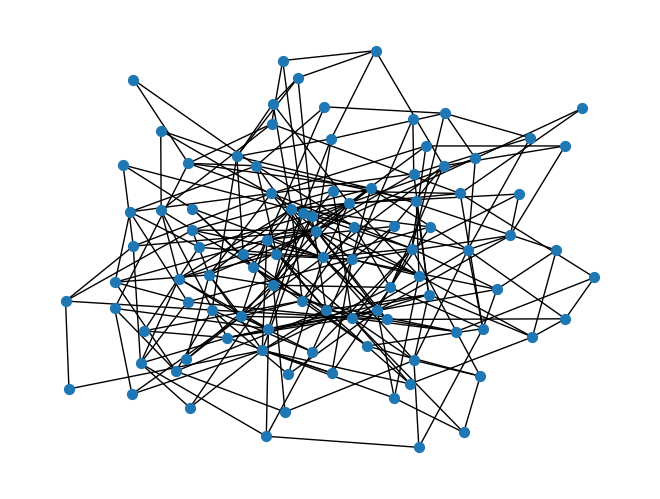

In [ ]:
#Preferential attachment
def create_pa(vertex_num: int,edge_num: int):
  m=edge_num
  l=vertex_num
  C = nx.complete_graph(m) # start with a complete graph s.t. every initial node can be reach
  c = (m-1)
  for i in range(l):
    if c==0: #initialization if there is only one node
       c=c+1
       C.add_edge(1,0,length=1)
    else:
      c=c+1
      liste_deg=C.degree(range(c))
       # take the degree

      liste = np.random.choice(range(c), m,liste_deg) # pick in the list between 0 and c-1, m element with weight p
      for n in liste:
        C.add_edge(c,n,length=1)
  return C
G3=create_pa(num_nodes,3)
nx.draw(G3,node_size=50)
clo_G3 = nx.closeness_centrality(G3)



## Second task of the week 
To understand if PA was a good choice, we were asked to make some comparisons with metrics. 
The average clustering coefficient, the degree distribution, transitivity, the average distance between nodes, the diameter of the network, and the distribution of centrality measures (e.g., betweenness centrality, closeness centrality, or eigenvector centrality) are a few examples of what we could have chosen. The objective is to guarantee a thorough comprehension of every comparisons we make. 
Firstly we have computed the degree distribution and the average degree for PA to make comparisons with the results of the original graph.

In [40]:
average_degree_pa = (2*len(G3.edges()))/len(G3.nodes()) #check the average degree
print(average_degree_pa)

5.649484536082475


In [41]:
print(average_degree)

5.76595744680851


Thanks to this check we can observe that already in week 1 we searched for the average degree of the original graph , and it was about *5,7* .
By the printed results we can say that they are sufficiently similar, and so we can say the two graphs are coherent

### COMPARISONS WITH OTHER SIMILARITIES:  

In [42]:
#We are checking the degree distribution of the original graph 

degree_distribution_original = Counter(G.degree(node) for node in nodes)
print(degree_distribution_original)


Counter({2: 24, 5: 16, 8: 11, 6: 10, 1: 10, 4: 10, 3: 5, 11: 2, 89: 1, 45: 1, 7: 1, 19: 1, 9: 1, 10: 1})


In [ ]:
# We are checking the degree distribution of the graph with the PA

degree_distribution_PA_graph = Counter(G3.degree(node) for node in nodes)
print(degree_distribution_PA_graph)


Counter({4: 20, 5: 18, 3: 18, 6: 9, 7: 7, 11: 4, 8: 4, 13: 3, 9: 3, 2: 3, 14: 2, 15: 1, 12: 1, 10: 1})


In [44]:
PA_transitivity=nx.transitivity(G3)
original_transitivity=nx.transitivity(G)
print("The transitivity of the graph created with PA is:",PA_transitivity)
print("The transitivity of the real graph is:",original_transitivity)

The transitivity of the graph created with PA is: 0.07159487776484284
The transitivity of the real graph is: 0.1918081918081918


In [45]:
diameter_PA = nx.diameter(G3)
diameter_original = nx.diameter(G)
print("The diameter of the graph created with PA is:",diameter_PA)
print("The diameter of the original graph is:",diameter_original)

The diameter of the graph created with PA is: 5
The diameter of the original graph is: 4


In [46]:
average_distance_PA = nx.average_shortest_path_length(G3)
average_distance_original = nx.average_shortest_path_length(G)
print('The average shortest distance of the graph created with PA',average_distance_PA)
print('The average shortest distance of the original graph',average_distance_original)

The average shortest distance of the graph created with PA 2.7671821305841924
The average shortest distance of the original graph 1.9949668268130862


In [47]:
#using the function defined in week 3 we compared the values of the betweenness centrality 
print(f'The betweenness centrality for the original graph is: {betweenness_values}')


betweenness_values_PA= normalized_betweenness_of(G3)
print(f'The betweenness centrality for the PA graph is: {betweenness_values_PA}')




The betweenness centrality for the original graph is: {0: 0.0, 1: 0.0, 2: 0.007534673523453334, 3: 0.00021427458313853825, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0015778401122019644, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.008683964469378217, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0003116721209287829, 35: 0.8073398784478716, 36: 0.0, 37: 0.0, 38: 0.0001168770453482936, 39: 0.0, 40: 0.0, 41: 0.13618902914134373, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0010324139005765936, 48: 0.028054386785102046, 49: 0.0, 50: 0.0, 51: 0.000896057347670251, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.002805049088359046, 63: 0.0007597007947639084, 64: 0.01301620695028831, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.005006233442418577, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 

## Conclusion
After considerable consideration, we came to the conclusion that preference attachment better explains and best matches our situation. Given the data suggesting the existence of a highly central node (node 35) with a noticeably high degree, this is consistent with our initial assumptions, as was previously described. The notion that the network expands in a way that is compatible with preferential attachment—where new connections are more likely to develop with already well-connected nodes—is strongly supported by the presence of such a center node.

## WEEK 10  

The requirements for the last week were to perform one of the propagation models from the following options:  

- **Threshold model (synchronous)**  
- **Threshold model (asynchronous, random order)**  
- **Fractional Threshold model (synchronous)**  
- **Fractional Threshold model (random order)**  
- **Independent Cascade model**  
- **Bass contagion model**  
- **SIS model**  

---

We chose to use the **Fractional Threshold Model (synchronous)**, a deterministic framework for the diffusion of innovation.  

### Why We Chose This Model  

- We believe that propagation tends to be more challenging in a graph with a **dense network of connections**.  
- However, the complexity of this process is heavily influenced by two key factors:  
  1. The **threshold value**.  
  2. The selection of the **initial outbreak node**.  

Starting the process from a **highly linked and central node** in the network can trigger many nodes in just a few steps.  


### Observations  

We acknowledge that our graph contains numerous **peripheral nodes** that can be easily activated using a threshold-based method.  

To confirm our hypothesis, we conducted tests with the **Fractional Threshold Model**, examining:  
- Various **threshold values**.  
- Different nodes as the **initial outbreak**.  

These tests were conducted as suggested by the tasks of the week.  


In [ ]:
# Creating the function for the fractional threshold
def fractional_threshold_simulation(graph, threshold_value, initial_active_nodes, iteration_limit):
    # Parameters: graph = the network, threshold_value → fraction threshold,
    # initial_active_nodes = initial outbreak, iteration_limit → max number of iterations

    # Initialization of states
    # We want to track the nodes activated in each iteration
    active_nodes = initial_active_nodes.copy()
    inactive_nodes = list(set(graph.nodes) - set(active_nodes))

    # Set all nodes as inactive at the beginning
    for node in graph.nodes():
        graph.nodes[node]['state'] = 'Inactive'
    for node in initial_active_nodes:  # Activate the initial outbreak nodes
        graph.nodes[node]['state'] = 'Active'

    total_nodes = graph.number_of_nodes()

    # Plot the initial graph state
    state_color_map = {'Inactive': 'w', 'Active': 'r'}  # Map from state to color
    nx.draw_circular(
        graph,
        node_size=150,
        with_labels=True,
        node_color=[state_color_map[graph.nodes[node]['state']] for node in graph]
    )
    plt.show()

    # Iteration process
    iteration = 1
    print('Number of active nodes at iteration:', iteration, 'is', len(active_nodes))
    print('Inactive nodes are:', inactive_nodes)

    while iteration <= iteration_limit - 1:
        iteration += 1
        for node in graph.nodes():  # Check all nodes
            active_neighbors_count = 0  # Counter for active neighbors
            for neighbor in graph.neighbors(node):  # Count active neighbors
                if graph.nodes[neighbor]['state'] == 'Active':
                    active_neighbors_count += 1

            neighbor_fraction_active = active_neighbors_count / len(list(graph.neighbors(node)))
            if neighbor_fraction_active >= threshold_value:  # Activate node if threshold is met
                graph.nodes[node]['state'] = 'Active'
                if node not in active_nodes:
                    active_nodes.append(node)

        # Update inactive nodes
        inactive_nodes = list(set(graph.nodes) - set(active_nodes))

        # Plot the graph state at the end of the iteration
        nx.draw_circular(
            graph,
            node_size=150,
            with_labels=True,
            node_color=[state_color_map[graph.nodes[node]['state']] for node in graph]
        )
        plt.show()

        print('Number of active nodes at iteration', iteration, 'is', len(active_nodes))
        if len(inactive_nodes) != 0:
            print('Inactive nodes are:', inactive_nodes)
        else:
            print('All nodes are activated!')
            break


# First try
We set up a 1/4 threshold that can be considered pretty small, and we figured out that with Forrest (node 35) as the initial outbreak, all the nodes are activated after only 4 iterations.


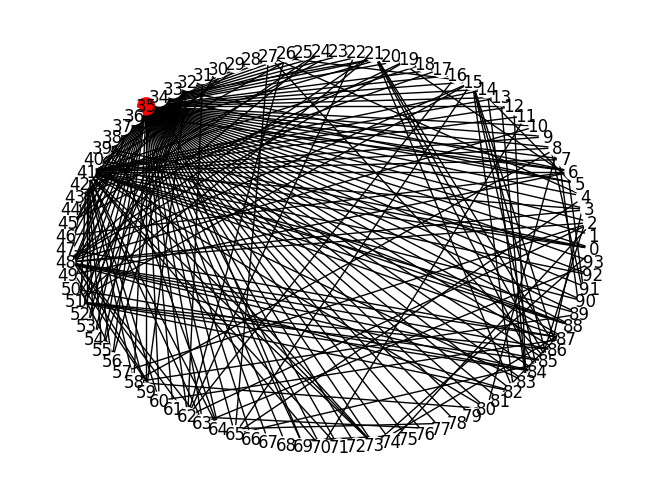

Number of active nodes at iteration: 1 is 1
Inactive nodes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


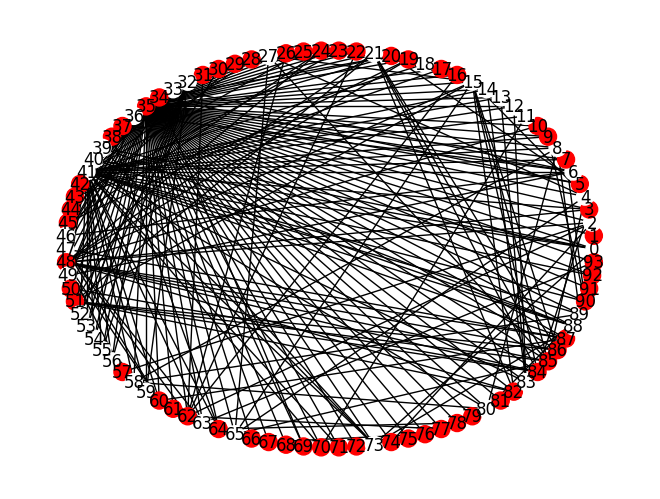

Number of active nodes at iteration 2 is 58
Inactive nodes are: [0, 2, 4, 6, 8, 11, 12, 13, 14, 15, 18, 21, 27, 32, 33, 36, 39, 40, 41, 46, 47, 49, 52, 53, 54, 55, 56, 58, 59, 63, 65, 73, 80, 83, 88, 89]


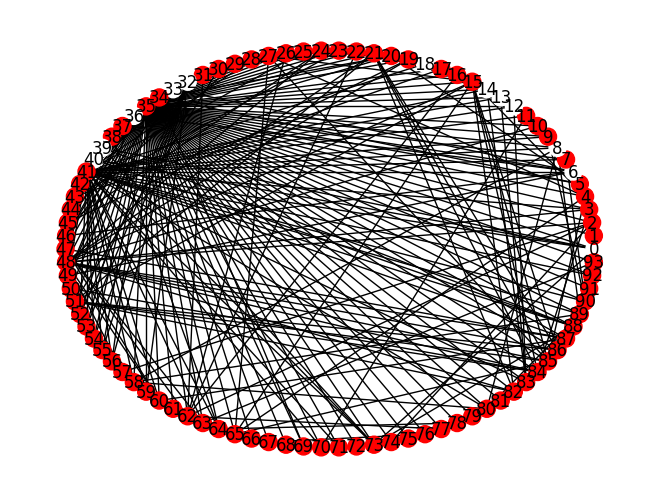

Number of active nodes at iteration 3 is 82
Inactive nodes are: [0, 32, 33, 36, 6, 39, 8, 40, 12, 13, 14, 18]


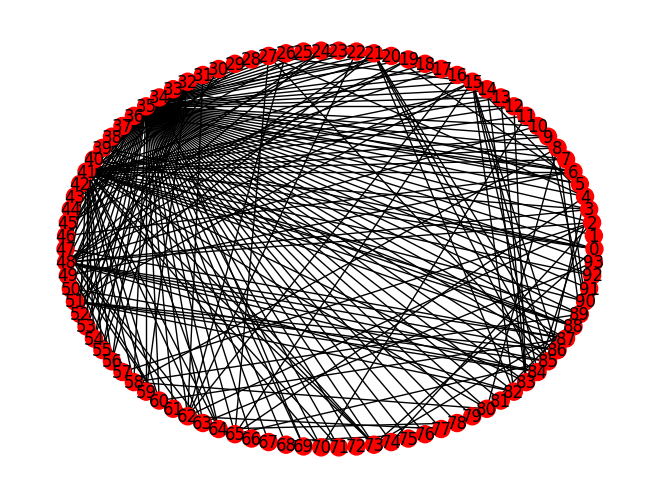

Number of active nodes at iteration 4 is 94
All nodes are activated!


In [49]:
outbreak = [35]
fractional_threshold_simulation(G2,1/4,outbreak,5)

To make other tries, we set up the threshold at 1/3, and we notice that increasing the threshold, Forrest alone can't activate all nodes. So we need to find a better initial outbreak if we want to mantain a threshold of 1/3. 


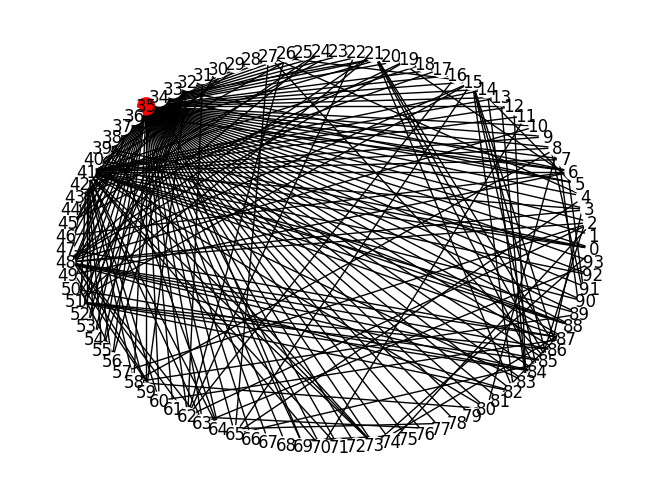

Number of active nodes at iteration: 1 is 1
Inactive nodes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


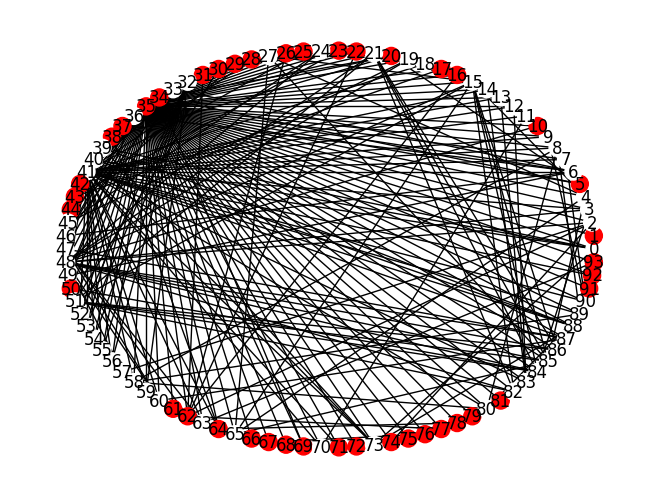

Number of active nodes at iteration 2 is 41
Inactive nodes are: [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19, 21, 24, 27, 32, 33, 36, 39, 40, 41, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 65, 70, 73, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90]


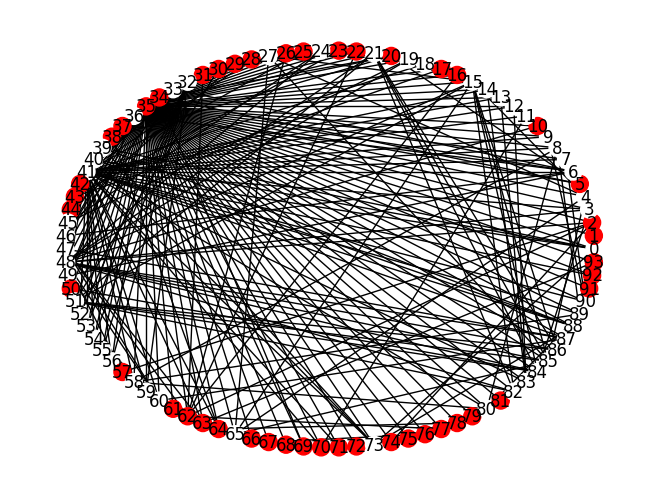

Number of active nodes at iteration 3 is 45
Inactive nodes are: [0, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 18, 19, 21, 24, 27, 32, 33, 36, 39, 40, 41, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 60, 65, 73, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90]


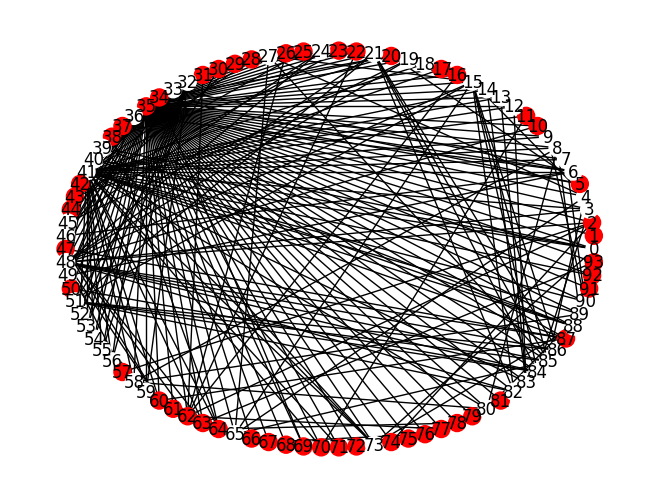

Number of active nodes at iteration 4 is 49
Inactive nodes are: [0, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 18, 19, 21, 24, 27, 32, 33, 36, 39, 40, 41, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 58, 59, 65, 73, 80, 82, 83, 84, 85, 86, 88, 89, 90]


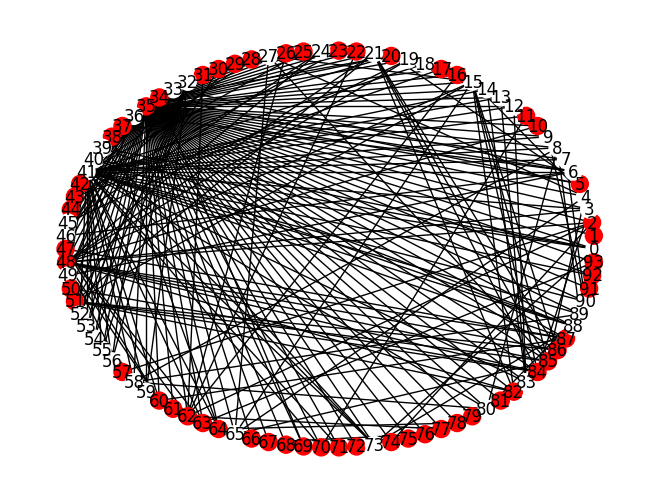

Number of active nodes at iteration 5 is 55
Inactive nodes are: [0, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 18, 19, 21, 24, 27, 32, 33, 36, 39, 40, 41, 45, 46, 49, 52, 53, 54, 55, 56, 58, 59, 65, 73, 80, 83, 88, 89, 90]


In [50]:
outbreak = [35]
fractional_threshold_simulation(G2,1/3,outbreak,5)

## Second try 
We tried to add Jenny (41) to the initial outbreak with the same threshold and time, but we notice that it is still not enough. 

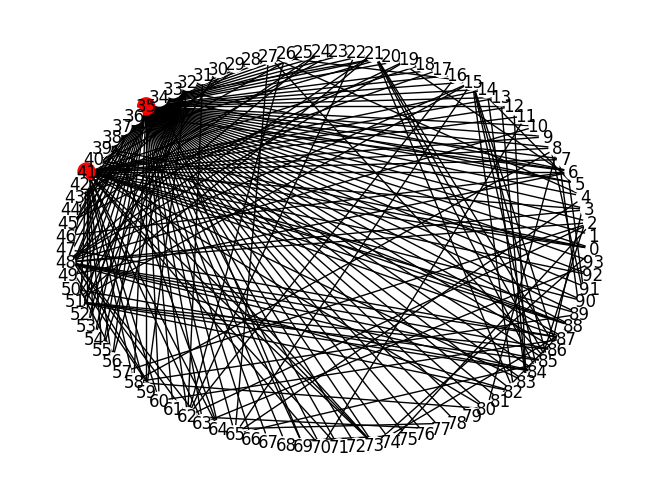

Number of active nodes at iteration: 1 is 2
Inactive nodes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


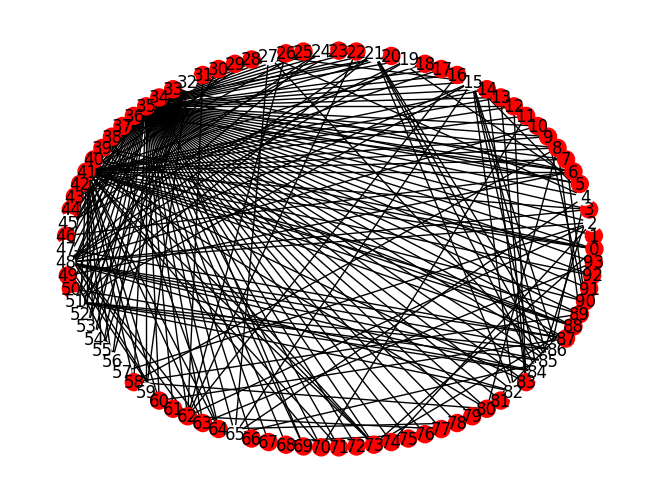

Number of active nodes at iteration 2 is 70
Inactive nodes are: [2, 4, 15, 19, 21, 24, 27, 32, 45, 47, 48, 51, 52, 53, 54, 55, 56, 57, 59, 65, 82, 84, 85, 86]


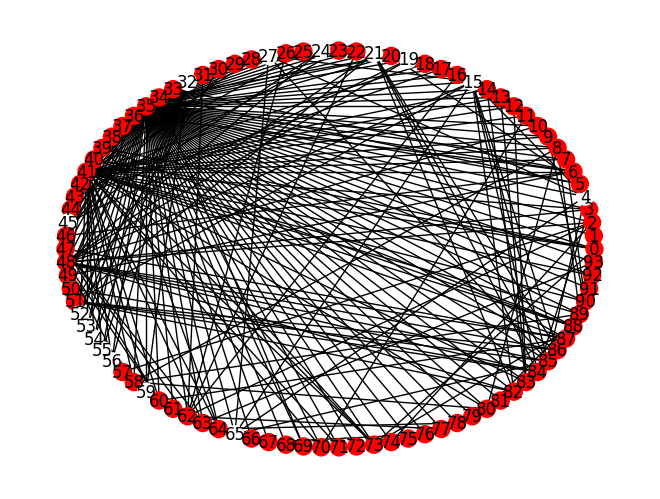

Number of active nodes at iteration 3 is 79
Inactive nodes are: [32, 65, 4, 59, 45, 15, 19, 52, 21, 53, 54, 24, 55, 56, 27]


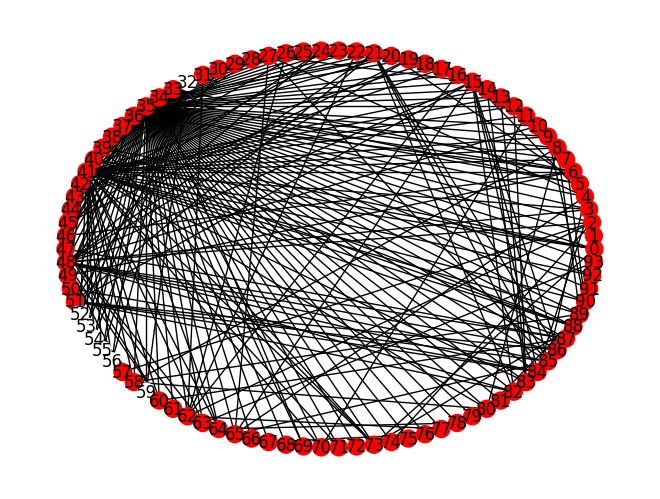

Number of active nodes at iteration 4 is 87
Inactive nodes are: [32, 52, 53, 54, 55, 56, 59]


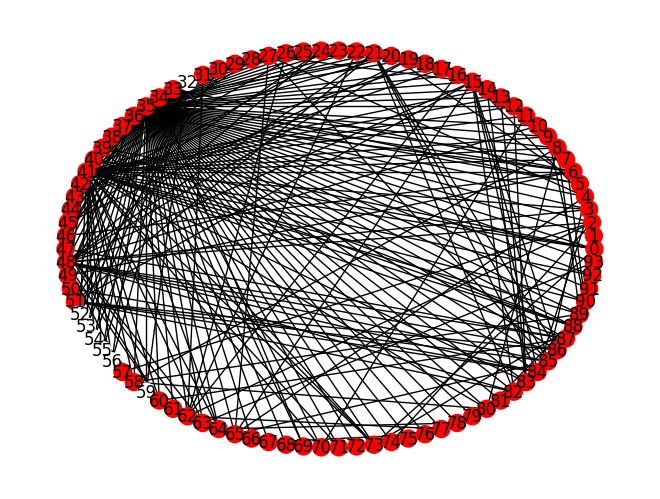

Number of active nodes at iteration 5 is 87
Inactive nodes are: [32, 52, 53, 54, 55, 56, 59]


In [51]:
outbreak = [35, 41]
fractional_threshold_simulation(G2,1/3,outbreak,5)

## Last try 
So we try adding to the initial outbreak a node of the inactive ones, and try to redo it again. 

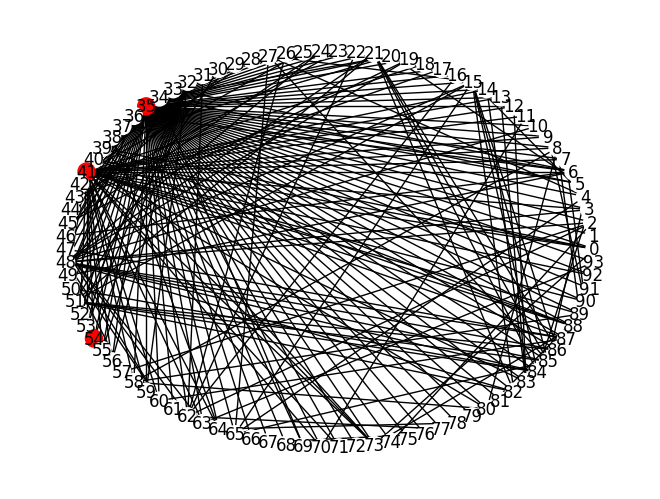

Number of active nodes at iteration: 1 is 3
Inactive nodes are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]


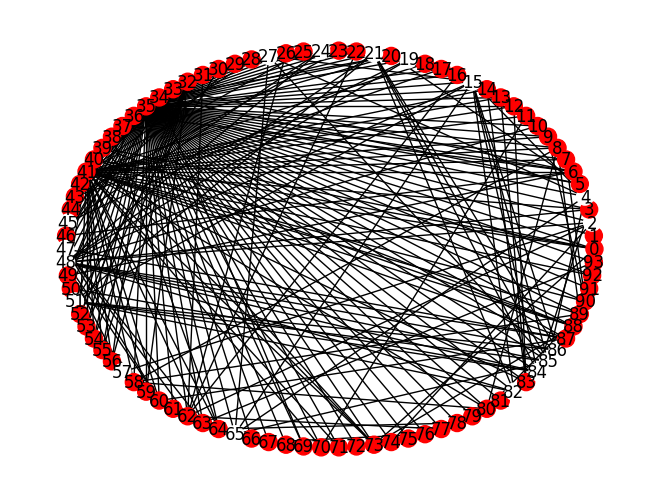

Number of active nodes at iteration 2 is 77
Inactive nodes are: [65, 2, 4, 45, 15, 47, 48, 82, 19, 51, 21, 84, 85, 24, 57, 86, 27]


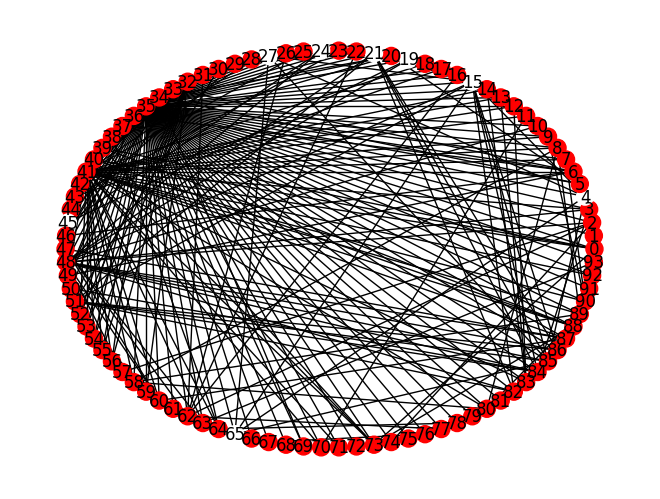

Number of active nodes at iteration 3 is 86
Inactive nodes are: [65, 4, 45, 15, 19, 21, 24, 27]


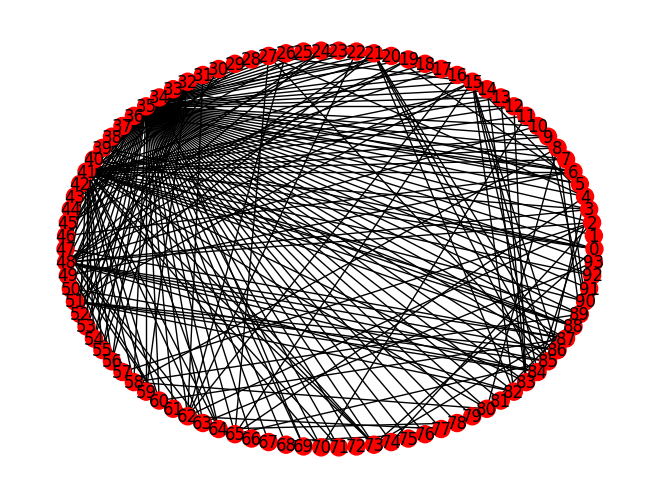

Number of active nodes at iteration 4 is 94
All nodes are activated!


In [52]:
outbreak = [35,41,54]
fractional_threshold_simulation(G2,1/3,outbreak,5)

At the **4th iteration**, we can see that **all the nodes have been activated**.  

To conclude, we can say that with a **threshold of 1/3** and a **time limit of 5**, one of the possible best initial outbreak sets to use is composed of:  
- **Forrest (35)**  
- **Jenny (41)**  
- **MAN#2 (54)**  


## CONCLUSION  

As we expected from the results of the previous weeks, **Node 35 (Forrest)** manages to activate almost all nodes alone, highlighting its **centrality and influence** in the network.  

Generally speaking, we proved that a **lower threshold** leads to a **faster and bigger activation** of nodes.  
